# Case Study Project - Office Supplies

Congratulations, you have just landed your first job as a data analyst at Pens & Printers! Pens & Printers is a national office supplies chain. They have just reported a **23% drop in revenue in the past year**. At the moment, they send office supplies out of warehouses in four regions: East, West, South, and Central, and all four warehouses stock the same products.

**The Head of Sales** thinks this leads to large amounts of unsold products in some locations. The management at Pens & Printers would like you to look at the data and **present to them the popularity of products in each region**. 

1. Are there products that do not sell in some locations? 
2. Are there any other patterns over time in each region that you can find in the data?

**Terminology**

- Sales: the money a customer pay for goods or services. 
- Profits: revenues minus costs and expenses, debts, operating costs etc.
- Revenues: the entire income of a company. Sales are the core component but not the only one, e.g some revenues can come from equities. Costs or expenses incurred to operate the businees are not deducted.

In [86]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

rng = np.random.default_rng(9901)

## Load and clean dataset

In [87]:
# dataset_url = 'https://s3.amazonaws.com/talent-assets.datacamp.com/office_supplies.csv'
dataset_url = '.data/office_supplies.csv'
df_raw = pd.read_csv(dataset_url, parse_dates=['Order Date'])

In [88]:
df_raw['Price_Unit'] = df_raw['Sales'] / df_raw['Quantity']
df_raw.sample(5)

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Price_Unit
177,CA-2016-166429,2016-09-02,Standard Class,West,TEC-CO-10002095,Technology,Copiers,Hewlett Packard 610 Color Digital Copier / Pri...,999.980,2,0.0,NaN,499.990
6194,CA-2015-143105,2015-12-10,Same Day,East,OFF-PA-10002713,Office Supplies,Paper,"Adams Phone Message Book, 200 Message Capacity...",41.280,6,0.0,18.9888,6.880
443,US-2016-155173,2016-03-06,Standard Class,East,TEC-PH-10002538,Technology,Phones,Grandstream GXP1160 VoIP phone,68.238,3,0.4,NaN,22.746
9159,CA-2014-117464,2014-07-22,Second Class,West,OFF-AR-10003190,Office Supplies,Art,Newell 32,11.520,4,0.0,3.2256,2.880
4710,CA-2014-100006,2014-09-07,Standard Class,East,TEC-PH-10002075,Technology,Phones,AT&T EL51110 DECT,377.970,3,0.0,109.6113,125.990


In [89]:
df_raw.groupby(['Region', 'Product ID']).sum().sort_values(by=['Region', 'Quantity'])
df_raw.groupby(['Sub-Category'])['Price_Unit'].agg(['mean', 'median', 'min', 'max']) \
    .sort_values(by='median')

,mean,median,min,max
Sub-Category,,,,
Fasteners,3.288756,2.840,0.912,11.480
Labels,8.320423,3.984,2.088,98.310
Art,8.818075,4.240,1.112,139.128
Binders,36.672279,5.380,0.336,1889.990
Paper,15.578958,6.480,1.744,104.850
Supplies,69.308105,8.475,1.664,1637.530
Envelopes,18.874843,9.304,1.632,162.930
Furnishings,25.607413,14.136,1.164,209.840
Accessories,55.356630,29.990,0.792,421.950


In [90]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9993 non-null   object        
 1   Order Date    9993 non-null   datetime64[ns]
 2   Ship Mode     9993 non-null   object        
 3   Region        9993 non-null   object        
 4   Product ID    9993 non-null   object        
 5   Category      9993 non-null   object        
 6   Sub-Category  9993 non-null   object        
 7   Product Name  9993 non-null   object        
 8   Sales         9993 non-null   float64       
 9   Quantity      9993 non-null   int64         
 10  Discount      9993 non-null   float64       
 11  Profit        8000 non-null   float64       
 12  Price_Unit    9993 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 1015.0+ KB


In [91]:
df_raw.describe()

,Sales,Quantity,Discount,Profit,Price_Unit
count,9993.000000,9993.000000,9993.000000,8000.000000,9993.000000
mean,229.854588,3.789553,0.156218,28.134233,60.919062
std,623.276194,2.225220,0.206456,227.328814,142.934583
min,0.444000,1.000000,0.000000,-6599.978000,0.336000
25%,17.280000,2.000000,0.000000,1.814700,5.470000
50%,54.480000,3.000000,0.200000,8.765100,16.270000
75%,209.940000,5.000000,0.200000,29.950500,63.940000
max,22638.480000,14.000000,0.800000,8399.976000,3773.080000


Encode categories and simplify types.

In [92]:
display('Region', df_raw['Region'].unique())
display('Ship Mode', df_raw['Ship Mode'].unique())
display('Category', df_raw['Category'].unique())
display('Sub-Category', df_raw['Sub-Category'].unique())
display('Product Name', df_raw['Product Name'].nunique())

'Region'

array(['West', 'East', 'Central', 'South'], dtype=object)

'Ship Mode'

array(['First Class', 'Standard Class', 'Second Class', 'Same Day'],
      dtype=object)

'Category'

array(['Technology', 'Office Supplies', 'Furniture'], dtype=object)

'Sub-Category'

array(['Accessories', 'Supplies', 'Phones', 'Furnishings', 'Fasteners',
       'Storage', 'Paper', 'Chairs', 'Binders', 'Art', 'Appliances',
       'Envelopes', 'Labels', 'Bookcases', 'Machines', 'Copiers',
       'Tables'], dtype=object)

'Product Name'

1850

In [93]:
def encode(df):
    df_cat = df.copy()
    df_cat['Region'] = df_cat['Region'].astype('category')
    df_cat['Ship Mode'] = df_cat['Ship Mode'].astype('category')
    df_cat['Category'] = df_cat['Category'].astype('category')
    df_cat['Sub-Category'] = df_cat['Sub-Category'].astype('category')
    df_cat['Quantity'] = df['Quantity'].astype('int8')
    return df_cat

df_enc = encode(df_raw)
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9993 non-null   object        
 1   Order Date    9993 non-null   datetime64[ns]
 2   Ship Mode     9993 non-null   category      
 3   Region        9993 non-null   category      
 4   Product ID    9993 non-null   object        
 5   Category      9993 non-null   category      
 6   Sub-Category  9993 non-null   category      
 7   Product Name  9993 non-null   object        
 8   Sales         9993 non-null   float64       
 9   Quantity      9993 non-null   int8          
 10  Discount      9993 non-null   float64       
 11  Profit        8000 non-null   float64       
 12  Price_Unit    9993 non-null   float64       
dtypes: category(4), datetime64[ns](1), float64(4), int8(1), object(3)
memory usage: 674.7+ KB


Impute missing values

In [94]:
df_raw.loc[:, 'Order Year'] = df_raw['Order Date'].dt.year
df_raw[df_raw['Profit'].isna()]['Order Year'].value_counts()

2017    650
2016    508
2015    434
2014    401
Name: Order Year, dtype: int64

In [95]:
df_raw['Order Year'] = df_raw['Order Date'].dt.year
# df_raw['Revenue'] = df_raw['Quantity'] * df_raw['Sales']
df_raw.groupby('Order Year')[['Profit', 'Quantity', 'Sales']] \
    .agg(['mean', 'median', 'sum', 'min', 'max'])

Profit                                            Quantity  \
                 mean  median         sum        min        max      mean   
Order Year                                                                  
2014        27.517244  8.2215  43807.4519 -1811.0784  4630.4755  3.803813   
2015        30.597029  9.7092  51005.2479 -2639.9912  3177.4750  3.795812   
2016        28.784214  8.6360  59842.3817 -6599.9780  8399.9760  3.802474   
2017        26.453336  8.5544  70418.7811 -3839.9904  5039.9856  3.766908   

                                       Sales                              \
           median    sum min max        mean  median          sum    min   
Order Year                                                                 
2014          3.0   7581   1  14  242.974159  51.968  484247.4981  0.852   
2015          3.0   7975   1  14  223.830818  59.904  470268.5490  0.984   
2016          3.0   9837   1  14  235.487282  52.680  609205.5980  0.836   
2017          3.0  12476   1  14  221.381418  53.810  733215.2552  0.444   

                      
                 max  
Order Year            
2014        22638.48  
2015         6354.95  
2016        17499.95  
2017        13999.96

In [96]:
df_profit_by_subcat = df_raw.groupby('Sub-Category')['Profit'] \
    .agg(['mean', 'median', 'min', 'max'])
df_profit_by_subcat 

,mean,median,min,max
Sub-Category,,,,
Accessories,56.963983,21.50640,-75.5958,829.3754
Appliances,40.938546,19.34520,-1181.2824,735.0336
Art,8.092276,3.72000,0.1548,111.8240
Binders,17.113127,4.17960,-2929.4845,4630.4755
Bookcases,-19.447716,5.79800,-1665.0522,407.1288
Chairs,45.729568,14.04870,-630.8820,770.3520
Copiers,810.147069,376.49355,59.9980,8399.9760
Envelopes,28.332983,12.50805,0.5508,204.0714
Fasteners,4.522643,2.95470,-11.8256,21.8880


How are null profits distributed with respect to sub-categories?

In [97]:
df_raw[df_raw['Profit'].isna()].groupby('Sub-Category')['Order ID'].count() \
    .sort_values(ascending=False)

Sub-Category
Binders        309
Paper          271
Furnishings    204
Accessories    175
Phones         168
Storage        166
Art            148
Chairs         115
Appliances     104
Labels          73
Tables          65
Bookcases       46
Supplies        41
Envelopes       38
Fasteners       36
Machines        20
Copiers         14
Name: Order ID, dtype: int64

Null profits are present roughly equally for discounted and not discounted products.

In [98]:
df_nas = df_raw[df_raw['Profit'].isna()]
pd.cut(df_nas['Discount'],
       labels=['Full price', 'Discounted'],
       include_lowest=True, right=False,
       bins=[0, 0.1, 1.0]) \
       .value_counts(normalize=True)

Discounted    0.548419
Full price    0.451581
Name: Discount, dtype: float64

More products had null profits in 2017 and 2016 than in 2015 and 2014.



In [99]:
df_nas.groupby('Order Year')['Order ID'].count()

Order Year
2014    401
2015    434
2016    508
2017    650
Name: Order ID, dtype: int64

In [100]:
df_nas.groupby(['Order Year', 'Category'])['Order ID'].count().unstack()

Category,Furniture,Office Supplies,Technology
Order Year,,,
2014,68,259,74
2015,87,267,80
2016,127,280,101
2017,148,380,122


In [101]:
def impute_done_wrong(df):
    '''
    This is wrong because it can impute a profit greater than the sale which is
    non-sense.
    '''
    df_imp = df.copy()
    df_profit_by_subcat = df_imp.groupby('Sub-Category')['Profit'].median()
    # Fill null values with the median of the sub-category is belongs to.
    # This probably over-estimates profits.
    for cat in df_imp['Sub-Category'].unique():
        mask = ((df_imp.Profit.isna()) & (df_imp['Sub-Category'] == cat))
        v = df_profit_by_subcat.loc[cat]
        df_imp.loc[mask, 'Profit'] = df_imp.loc[mask, 'Profit'].fillna(v)
    return df_imp

def impute(df):
    df_imp = df.copy()
    for cat in df_imp['Sub-Category'].unique():
        mask = ((df_imp['Profit'].isna()) & (df_imp['Sub-Category'] == cat))
        df_cat = df_imp[
            (df_imp['Sub-Category'] == cat) & (~df_imp['Profit'].isna())
        ]
        # Calculate the range of profit to sales ratio for the sub-cat and 
        # randomly pick a value in the range to fill the missing value.
        # profit_range = (df_cat['Profit'] / df_cat['Sales']).agg(['min', 'max'])
        # random_sale_to_profit_ratio = rng.uniform(*profit_range.tolist(), 
        #                                           size=df_cat.shape[0])
        median_profit_ratio = (df_cat['Profit'] / df_cat['Sales']).median()
        df_imp.loc[mask, 'Profit'] = df_imp.loc[mask, 'Sales'] * median_profit_ratio
    return df_imp

In [102]:
df_imp = impute(df_raw)
assert df_imp.isna().sum().sum() == 0, df_imp.isna()
assert (df_imp['Sales'] > df_imp['Profit']).all()

Imputing values adds about 10% to yearly profits.

In [103]:
df_raw_profit_stats = df_raw.groupby('Order Year')['Profit'] \
    .agg(['mean', 'median', 'sum', 'min', 'max'])
df_imp_profit_stats = impute(df_raw).groupby('Order Year')['Profit'] \
    .agg(['mean', 'median', 'sum', 'min', 'max'])
display(
    df_raw_profit_stats, 
    df_imp_profit_stats,
    df_imp_profit_stats['sum'] / df_raw_profit_stats['sum'] - 1,
)

,mean,median,sum,min,max
Order Year,,,,,
2014,27.517244,8.2215,43807.4519,-1811.0784,4630.4755
2015,30.597029,9.7092,51005.2479,-2639.9912,3177.4750
2016,28.784214,8.6360,59842.3817,-6599.9780,8399.9760
2017,26.453336,8.5544,70418.7811,-3839.9904,5039.9856


,mean,median,sum,min,max
Order Year,,,,,
2014,28.343848,8.625000,56489.288758,-1811.0784,4630.4755
2015,30.398138,9.890100,63866.487324,-2639.9912,3177.4750
2016,31.041582,9.355500,80304.572967,-6599.9780,8399.9760
2017,28.839020,8.876962,95514.835528,-3839.9904,5039.9856


Order Year
2014    0.289490
2015    0.252155
2016    0.341935
2017    0.356383
Name: sum, dtype: float64

Put it all together to have a clean dataset

In [104]:
def munge_dataset(url=dataset_url):
    df = pd.read_csv(url, parse_dates=['Order Date'])
    df = encode(df)
    df = impute(df)
    df['Order Year'] = df['Order Date'].dt.year
    df['Order Month'] = df['Order Date'].dt.month
    df['Price_Unit'] = df['Sales'] / df['Quantity']
    return df

## Exploratory Data Analysis

In [105]:
df = munge_dataset()

In [106]:
df_q = df.groupby(['Region', 'Order Year'])[['Sales']].quantile(q=[0.25, 0.5, 0.75])

def get_quantile_by_year(q: float, year: int) -> float:
    return df_q.unstack(0).loc[year, q]

def mk_mask(region: str, sales_threshold: float) -> pd.DataFrame:
    return ((df['Region'] == region) 
            & (df['Sales'] <= sales_threshold.loc['Sales', region]))

bottom_q_2017 = get_quantile_by_year(0.25, 2017)
top_q_2017 = get_quantile_by_year(0.75, 2017)


In [107]:
from typing import List, Union 

def sums_with_change(col: str, groups: Union[str, List[str]], df=df) -> pd.DataFrame:
    df_ = df.groupby(groups)[[col]].agg('sum')
    df_ = df_.assign(**{
        'Abs Change': df_.rolling(2).apply(np.diff),
        'Year-Over-Year': df_.rolling(2).apply(lambda x: x[1] / x[0] - 1,
                                               raw=True),
    }).fillna(0)
    # df_.columns = pd.MultiIndex.from_tuples([
    #     (col, l2 if l2 != '' else l1) 
    #     for (l1, l2) in df_.columns.to_flat_index()
    # ])
    return df_


Unit price distribution for products in different sub-categories.

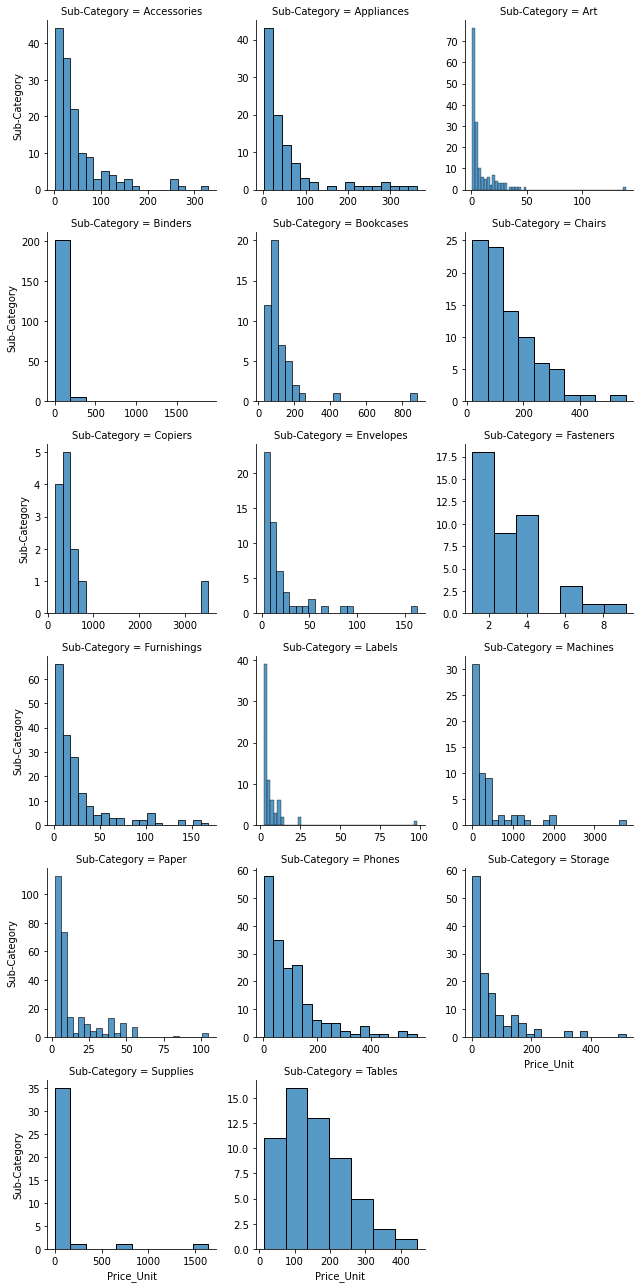

In [120]:
g = sns.FacetGrid(data=df.drop_duplicates(subset=['Product ID']), 
                  col='Sub-Category', col_wrap=3,
                  sharey=False, sharex=False)
def plot(pu, sc, **kwargs):
    bins = 10 if sc.unique()[0] == 'Binders' or sc.unique()[0] == 'Supplies' else 'auto'
    sns.histplot(pu, bins=bins)
_ = g.map(plot, 'Price_Unit', 'Sub-Category')
# g = sns.displot(kind='hist', data=df_p, x='Price_Unit', col='Sub-Category', 
#                 col_wrap=3, facet_kws=dict(sharey=False, sharex=False))

### Sales and profit

Sales increased by 20% in 2017 in aggregate.

In [ ]:
df_swc_sales = sums_with_change('Sales', ['Order Year'])
df_swc_sales

,Sales,Abs Change,Year-Over-Year
Order Year,,,
2014,484247.4981,0.0000,0.000000
2015,470268.5490,-13978.9491,-0.028867
2016,609205.5980,138937.0490,0.295442
2017,733215.2552,124009.6572,0.203560


The rate of change of profits decreased in 2017.

In [ ]:
df_swc_profit = sums_with_change('Profit', ['Order Year'])
display(df_swc_profit)


,Profit,Abs Change,Year-Over-Year
Order Year,,,
2014,56489.288758,0.000000,0.000000
2015,63866.487324,7377.198566,0.130595
2016,80304.572967,16438.085642,0.257382
2017,95514.835528,15210.262561,0.189407


Profit isn't increasing at the same pace as sales. Both their rate of change decreased in 2017.

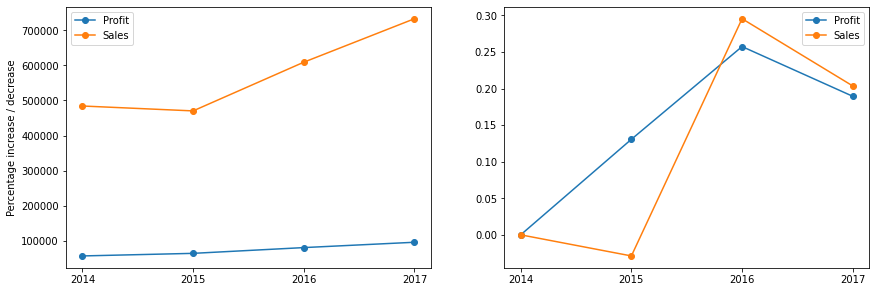

In [ ]:
df_swc_profit_ = df_swc_profit.reset_index()
df_swc_sales_ = df_swc_sales.reset_index()

_, (ax0, ax1) = plt.subplots(1, 2, figsize=(4.8 * 3, 4.8))
ax0.set_xticks([2014, 2015, 2016, 2017])
ax0.set_ylabel('Unit of currency')
ax1.set_xticks([2014, 2015, 2016, 2017])
ax0.set_ylabel('Percentage increase / decrease')
_ = ax0.plot(df_swc_profit_['Order Year'], df_swc_profit_['Profit'], 
             'o-', label='Profit')
_ = ax0.plot(df_swc_sales_['Order Year'], df_swc_sales_['Sales'], 
             'o-', label='Sales')
ax0.legend()
_ = ax1.plot(df_swc_profit_['Order Year'], df_swc_profit_['Year-Over-Year'], 
             'o-', label='Profit')
_ = ax1.plot(df_swc_sales_['Order Year'], df_swc_sales_['Year-Over-Year'], 
             'o-', label='Sales')
_ = ax1.legend()


#### Sales per region in 2017

In [ ]:
# df_sales = df.groupby(['Region', 'Order Year'])[['Sales']].agg('sum') 
# df_sales = df_sales.assign(**{
#     'Absolute Change': df_sales.rolling(2).apply(np.diff),
#     'Percentage Change': df_sales.rolling(2).apply(lambda x: x[1] / x[0] - 1),
# })
df_swc_sales_reg = sums_with_change('Sales', ['Region', 'Order Year'])
df_swc_sales_reg.loc[[(r, 2014) for r in df['Region'].unique()], 'Abs Change':] = np.nan
df_swc_sales_reg.fillna(0)

Sales  Abs Change  Year-Over-Year
Region  Order Year                                         
Central 2014        103838.1646      0.0000        0.000000
        2015        102610.2620  -1227.9026       -0.011825
        2016        147429.3760  44819.1140        0.436790
        2017        147098.1282   -331.2478       -0.002247
East    2014        128680.4570      0.0000        0.000000
        2015        156332.0570  27651.6000        0.214886
        2016        180685.8220  24353.7650        0.155782
        2017        213082.9040  32397.0820        0.179301
South   2014        103845.8435      0.0000        0.000000
        2015         71359.9805 -32485.8630       -0.312828
        2016         93610.2235  22250.2430        0.311803
        2017        122905.8575  29295.6340        0.312953
West    2014        147883.0330      0.0000        0.000000
        2015        139966.2495  -7916.7835       -0.053534
        2016        187480.1765  47513.9270        0.339467
        2017        250128.3655  62648.1890        0.334159

In [ ]:
df_swc_profit_reg = sums_with_change('Profit', ['Region', 'Order Year'])
df_swc_profit_reg.loc[[(r, 2014) for r in df['Region'].unique()], 'Abs Change':] = np.nan
df_swc_profit_reg.fillna(0)

Profit    Abs Change  Year-Over-Year
Region  Order Year                                            
Central 2014         7098.339937      0.000000        0.000000
        2015        13393.943962   6295.604025        0.886912
        2016        19798.082297   6404.138335        0.478137
        2017        10784.346556  -9013.735741       -0.455283
East    2014        17331.729022      0.000000        0.000000
        2015        18801.480708   1469.751686        0.084801
        2016        22417.484894   3616.004186        0.192326
        2017        34249.837493  11832.352599        0.527818
South   2014        11545.557375      0.000000        0.000000
        2015        11623.659538     78.102163        0.006765
        2016        15445.881925   3822.222386        0.328831
        2017         9412.581476  -6033.300449       -0.390609
West    2014        20513.662424      0.000000        0.000000
        2015        20047.403116   -466.259308       -0.022729
        2016        22643.123850   2595.720735        0.129479
        2017        41068.070004  18424.946153        0.813710

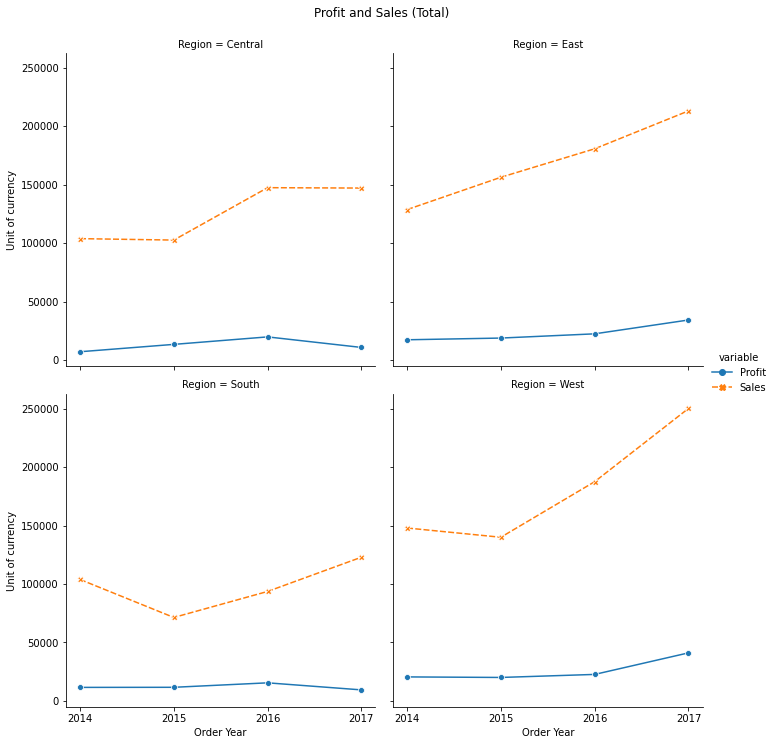

In [ ]:
df_swc_tot = pd.melt(
    df_swc_profit_reg.join(df_swc_sales_reg, 
                           lsuffix='_Profit', rsuffix='_Sales').fillna(0).reset_index(),
    id_vars=['Region', 'Order Year'],
    value_vars=['Profit', 'Sales'],
)
g = sns.relplot(kind='line', data=df_swc_tot, x='Order Year', 
                style='variable', markers=True,
                y='value', hue='variable', col='Region', col_wrap=2)

g.figure.suptitle(f'Profit and Sales (Total)', y=1.03)
for ax in g.axes.flatten():
    ax.set_xticks([2014, 2015, 2016, 2017])
    ax.set_ylabel('Unit of currency')

Plotting the rate of change paints a very different picture. The growth in the Central and South regions year-over-year is negative for both sales and profit.

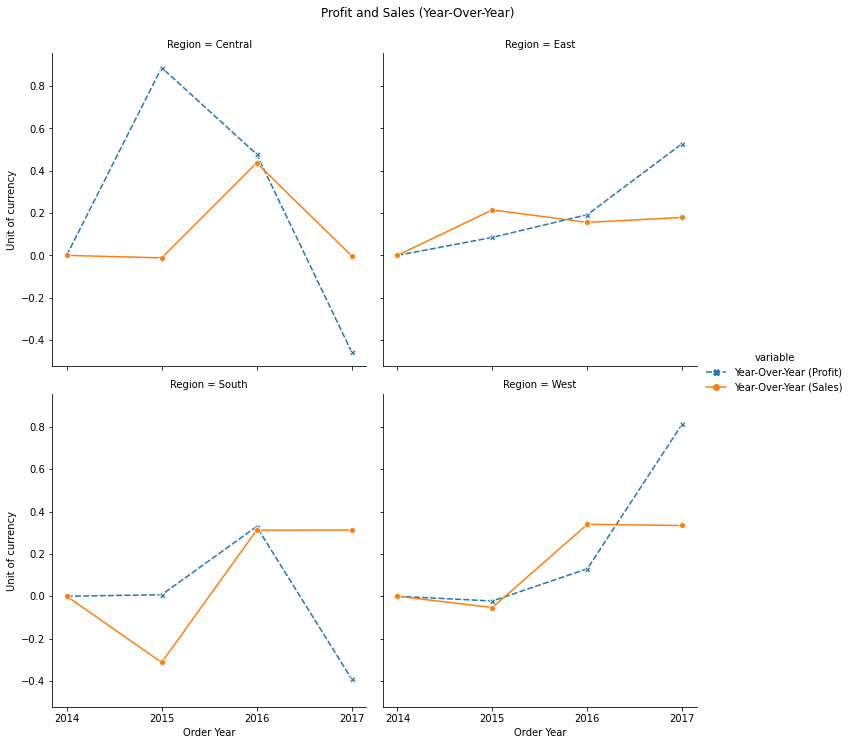

In [ ]:
df_swc_pct = pd.melt(
    df_swc_profit_reg.join(
        df_swc_sales_reg, 
        lsuffix=' (Profit)', 
        rsuffix=' (Sales)',
    ).fillna(0).reset_index(),
    id_vars=['Region', 'Order Year'],
    value_vars=['Year-Over-Year (Sales)', 'Year-Over-Year (Profit)'],
)
g = sns.relplot(kind='line', data=df_swc_pct, x='Order Year', markers=True,
                style='variable', hue_order=['Year-Over-Year (Profit)', 'Year-Over-Year (Sales)'],
                y='value', hue='variable', col='Region', col_wrap=2)
g.figure.suptitle(f'Profit and Sales (Year-Over-Year)', y=1.03)
for ax in g.axes.flatten():
    ax.set_xticks([2014, 2015, 2016, 2017])
    ax.set_ylabel('Unit of currency')

In [ ]:
# df_swc_sales_reg.sample()
df_ = df.groupby(['Region', 'Sub-Category', 'Order Year'])[['Profit']].agg('sum')
df_ = df_.assign(**{
    'Abs Change': df_.rolling(2).apply(np.diff),
    'YOY': df_.rolling(2).apply(lambda x: x[1] / x[0] - 1,
                                           raw=True),
}).fillna(0)

df_reg_sc_profit = sums_with_change('Profit', ['Region', 'Sub-Category', 'Order Year'])
df_reg_sc_sales = sums_with_change('Sales', ['Region', 'Sub-Category', 'Order Year'])

for region in df['Region'].unique():
    for cat in df['Sub-Category'].unique():
        df_reg_sc_profit.loc[region, cat, 2014][['Abs Change', 'Year-Over-Year']] = 0
df_reg_sc_profit['Profit_log'] = np.log1p(df_reg_sc_profit['Profit'] - df_reg_sc_profit['Profit'].min())
df_reg_sc_sales['Sales_log'] = np.log1p(df_reg_sc_sales['Sales'])


In [ ]:
def relplot_subcategories(region: str, 
                          value_vars=['Profit', 'Sales'],
                          subcats=None) -> None:
    if subcats is None:
        subcats = df['Sub-Category'].unique().tolist() 
    df_join = df_reg_sc_profit.loc[region].join(
        df_reg_sc_sales.loc[region, ['Sales', 'Sales_log']]
    ).reset_index()
    df_join['Sub-Category_'] = df_join['Sub-Category'].astype(object)
    df_melt = pd.melt(
        frame=df_join[df_join['Sub-Category_'].isin(subcats)],
        id_vars=['Order Year', 'Sub-Category_'],
        value_vars=value_vars,
    )
    g = sns.relplot(kind='line', data=df_melt,
                    x='Order Year', y='value',
                    style='variable', markers=True,
                    hue='variable', col='Sub-Category_', col_wrap=3)
    g.figure.suptitle(f'{" & ".join(value_vars)} for {region} region', y=1.03)

In [ ]:
df_swc_pct = pd.melt(
    df_swc_profit_reg.join(
        df_swc_sales_reg, 
        lsuffix=' (Profit)', 
        rsuffix=' (Sales)',
    ).fillna(0).reset_index(),
    id_vars=['Region', 'Order Year'],
    value_vars=['Year-Over-Year (Sales)', 'Year-Over-Year (Profit)'],
)
g = sns.relplot(kind='line', data=df_swc_pct, x='Order Year', 
                markers=True, style='variable',
                y='value', hue='variable', col='Region', col_wrap=2)
g.figure.suptitle(f'Profit and Sales (Year-Over-Year)', y=1.03)
for ax in g.axes.flatten():
    ax.set_xticks([2014, 2015, 2016, 2017])
    ax.set_ylabel('Unit of currency')

In [ ]:
df_swc_profit_reg = sums_with_change('Profit', ['Region', 'Order Month'], df[df['Order Year'].isin([2017, 2016])])
df_swc_sales_reg = sums_with_change('Sales', ['Region', 'Order Month'], df[df['Order Year'].isin([2017, 2016])])

In [ ]:
# sums_with_change('Sales', ['Region', 'Order Month'], df[df['Order Year'].isin([2017])]).loc['Central']

In [ ]:
# sums_with_change('Sales', ['Region', 'Order Month'], df[df['Order Year'].isin([2016])]).loc['Central']

In [ ]:
# df_swc_profit_reg.loc['Central']
# df_swc_sales_reg.loc['Central']

#### Seasonality

Sales showed a great degree of seasonality in 2017 and 2016. Broadly speaking, business picks up in the second semester.

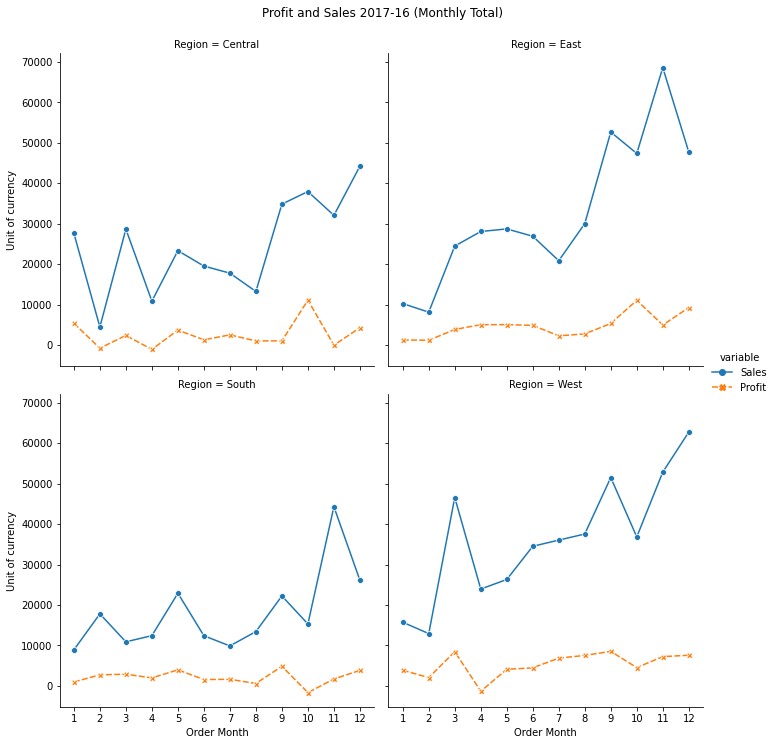

In [ ]:
df_swc_pct = pd.melt(
    df_swc_profit_reg.join(
        df_swc_sales_reg, 
        lsuffix=' (Profit)', 
        rsuffix=' (Sales)',
    ).fillna(0).reset_index(),
    id_vars=['Region', 'Order Month'],
    value_vars=['Sales', 'Profit'],
)
g = sns.relplot(kind='line', data=df_swc_pct, x='Order Month', 
                style='variable', markers=True,
                y='value', hue='variable', col='Region', col_wrap=2)
g.figure.suptitle(f'Profit and Sales 2017-16 (Monthly Total)', y=1.03)
for ax in g.axes.flatten():
    ax.set_xticks(range(1, 13))
    ax.set_ylabel('Unit of currency')

#### South and Central regions exploration

##### Discounts

Order Year,2014,2015,2016,2017
Region,,,,
Central,0.697425,0.640000,0.620232,0.632391
East,0.529981,0.456522,0.492167,0.492942
South,0.432665,0.508824,0.481840,0.563707
West,0.462935,0.479751,0.483230,0.442009


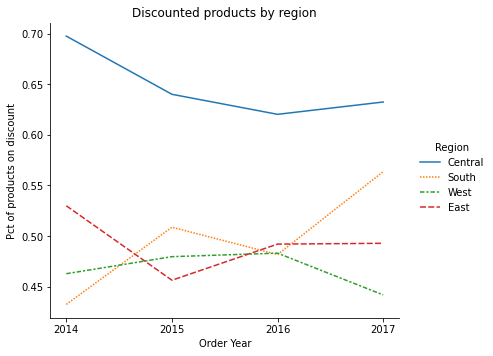

In [ ]:
# df['Has Discount'] = df[df['Discount'] ]
df['Has Discount'] = df['Discount'] > 0
df_discounts = df.groupby(['Region', 'Order Year'], as_index=False)['Has Discount'].agg(['sum', 'count', 'mean']) 
    # .apply(lambda x: {'discounted': x[0], 'total': x[1], 'ratio': x[0] / x[1]}, 
    #        axis=1, result_type='expand')

g = sns.relplot(kind='line', data=df_discounts.reset_index(),
                x='Order Year', y='mean', 
                hue='Region', hue_order=['Central', 'South', 'West', 'East'],
                style='Region')
g.figure.set_size_inches(4.8 * 1.5, 4.8)
g.ax.set_xticks(range(2014, 2018))
g.ax.set_ylabel('Pct of products on discount')
g.ax.set_title('Discounted products by region')

df_discounts.unstack()['mean'] #[[('mean', 2016), ('mean', 2017)]]

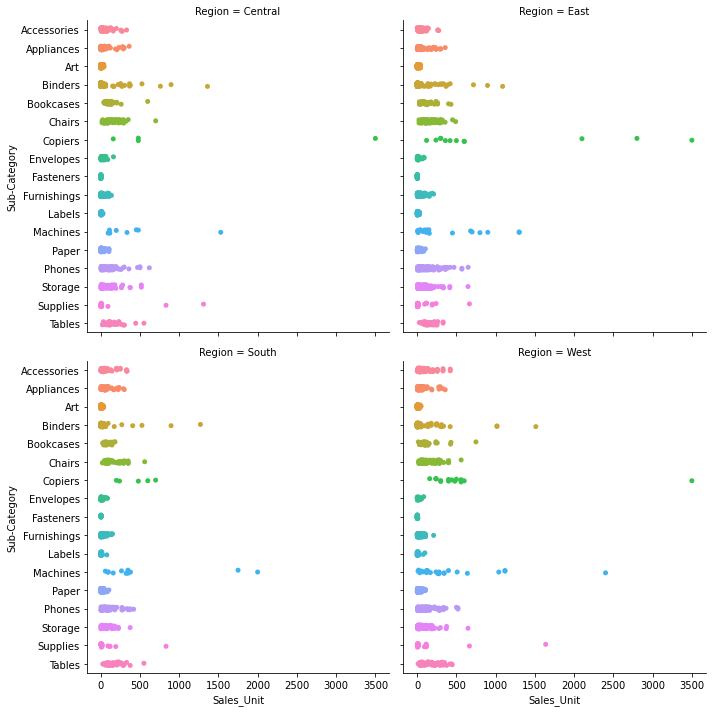

In [ ]:
g = sns.catplot(
    # kind='swarm',
    data=df[df['Order Year'].isin([2017, 2016])],
    # hue='Quantity',
    # size='Price_Unit',
    y='Sub-Category',
    x='Price_Unit',
    col='Region',
    col_wrap=2,
)

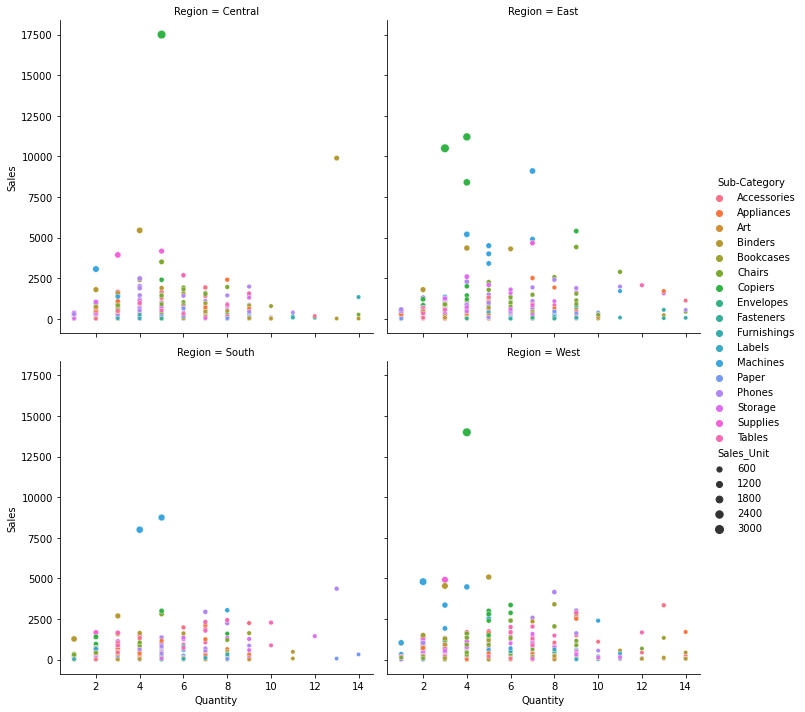

In [ ]:
g = sns.relplot(
    kind='scatter',
    data=df[df['Order Year'].isin([2017, 2016])],
    x='Quantity',
    size='Price_Unit',
    y='Sales',
    hue='Sub-Category',
    col='Region',
    col_wrap=2,
)

##### Profits and sales

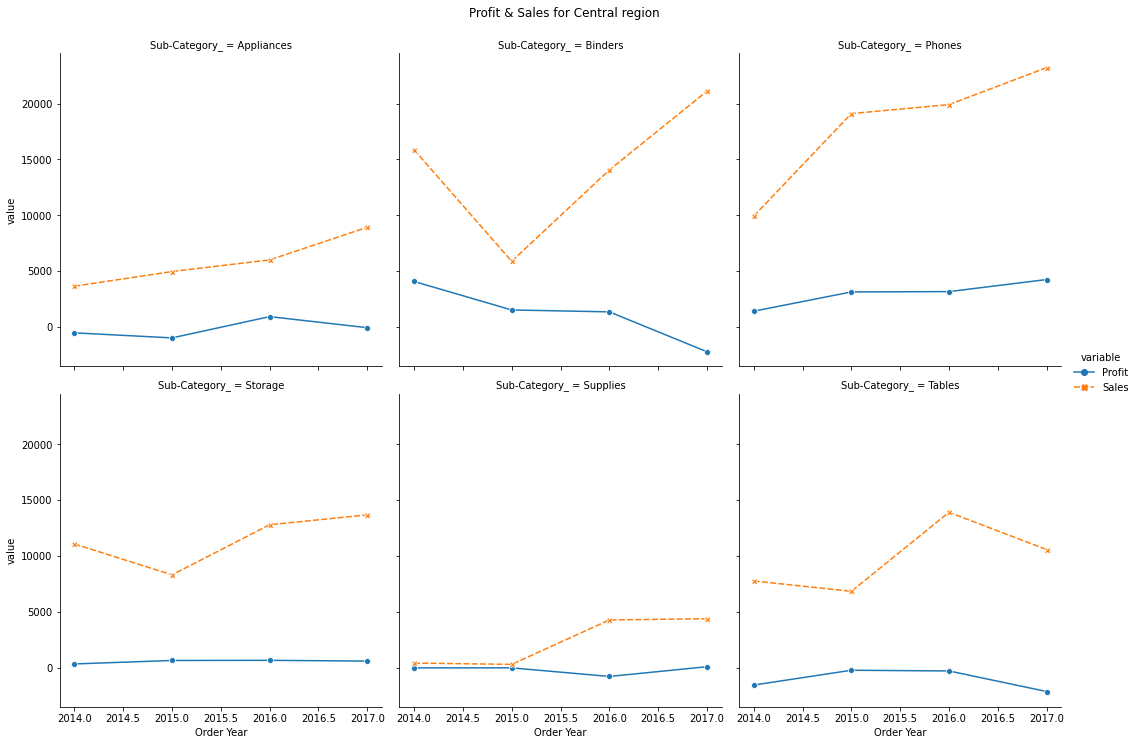

In [ ]:
subcats = ['Binders', 'Appliances', 'Phones', 'Storage', 'Tables', 'Supplies']
relplot_subcategories('Central', subcats=subcats)

In [ ]:
df[(df['Region'] == 'Central') & (df['Order Year'] == 2017) & (df['Sub-Category'] == 'Binders')] \
    .groupby(['Product ID', 'Discount']).agg(np.sum).sort_values(['Profit', 'Product ID'], ascending=True) \
.head(50) 

,,Sales,Quantity,Profit,Order Year,Order Month,Sales_Unit
Product ID,Discount,,,,,,
OFF-BI-10003527,0.8,2287.782,9,-3431.67300,4034,20,508.396
OFF-BI-10001120,0.8,1889.990,5,-2929.48450,2017,12,377.998
OFF-BI-10004632,0.8,609.980,10,-1067.46500,6051,11,182.994
OFF-BI-10004584,0.8,252.784,4,-417.09360,2017,2,63.196
OFF-BI-10000778,0.8,96.784,4,-145.17600,2017,10,24.196
OFF-BI-10002429,0.8,85.232,14,-136.37120,4034,18,12.176
OFF-BI-10001597,0.8,73.764,9,-118.02240,4034,13,16.392
OFF-BI-10001575,0.8,43.372,7,-69.39520,2017,4,6.196
OFF-BI-10000309,0.8,39.572,13,-61.33660,4034,16,6.088


In [ ]:
df[(df['Region'] == 'Central') & (df['Order Year'] == 2017) & (df['Sub-Category'] == 'Binders')] \
    .groupby(['Product ID']).agg(np.sum).sort_values(['Sales', 'Product ID'], ascending=False)
# df[df['Product ID'] == 'OFF-BI-10003527']

,Sales,Quantity,Discount,Profit,Order Year,Order Month,Sales_Unit
Product ID,,,,,,,
OFF-BI-10004995,5443.960,4,0.0,2504.2216,2017,1,1360.990
OFF-BI-10003527,2287.782,9,1.6,-3431.6730,4034,20,508.396
OFF-BI-10001120,1889.990,5,0.8,-2929.4845,2017,12,377.998
OFF-BI-10001359,1793.980,2,0.0,843.1706,2017,10,896.990
OFF-BI-10003650,1577.940,3,0.0,757.4112,2017,9,525.980
...,...,...,...,...,...,...,...
OFF-BI-10003784,1.680,5,0.8,-2.6880,2017,12,0.336
OFF-BI-10003094,1.408,2,0.8,0.4576,2017,11,0.704
OFF-BI-10000145,1.248,2,0.8,0.4056,2017,11,0.624


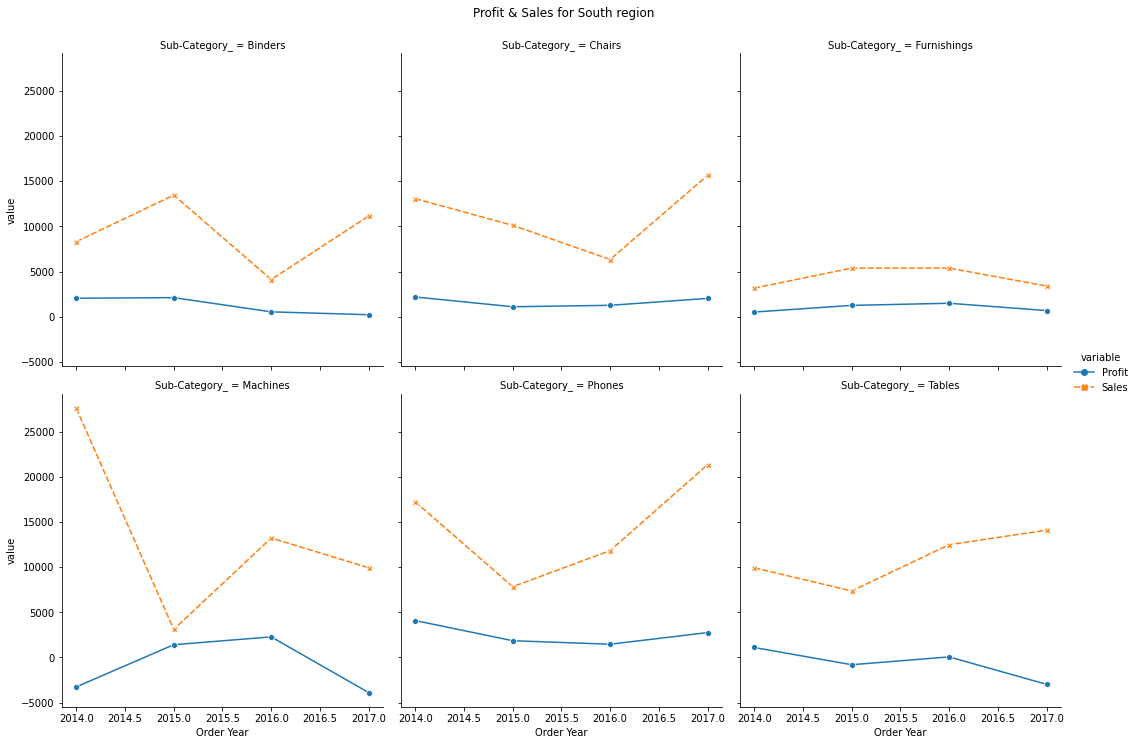

In [ ]:
subcats = ['Tables', 'Phones', 'Machines', 'Chairs', 'Binders', 'Furnishings']
relplot_subcategories('South', subcats=subcats)

In [ ]:
df[(df['Region'] == 'South') & (df['Order Year'] == 2017) & (df['Sub-Category'] == 'Tables')] \
    .groupby(['Product ID', 'Discount']).agg(np.sum).sort_values(['Sales', 'Product ID'], ascending=False) \
.head(50) 

,,Sales,Quantity,Profit,Order Year,Order Month,Sales_Unit
Product ID,Discount,,,,,,
FUR-TA-10000198,0.40,2314.1160,7,-1002.783600,2017,10,330.5880
FUR-TA-10001950,0.40,1875.2580,7,-224.361225,2017,10,267.8940
FUR-TA-10001889,0.40,1781.6820,7,-653.283400,2017,11,254.5260
FUR-TA-10003473,0.00,1504.5200,4,-180.005071,2017,10,376.1300
FUR-TA-10002903,0.40,934.9560,6,-111.860807,2017,12,155.8260
FUR-TA-10001889,0.45,933.2620,4,-111.658132,2017,5,233.3155
FUR-TA-10004575,0.00,872.9400,3,157.129200,2017,7,290.9800
FUR-TA-10004289,0.45,721.8750,6,-420.000000,2017,12,120.3125
FUR-TA-10003473,0.45,620.6145,3,-248.245800,2017,4,206.8715


##### Products analysis

In [ ]:
def get_products(df_yoy_diff, region, metric='Sales_Diff', ascending=True, 
                 add_cols=['Sales_Diff', 'Qty_Diff']):
    cols = ['Product ID', 'Product Name', 'Category', 'Sub-Category']
    return df[cols].drop_duplicates().merge(
        df_yoy_diff.loc[region].sort_values(metric, ascending=ascending).reset_index(),
        on='Product ID',
    )[cols + add_cols].sort_values(metric, ascending=ascending)

In [ ]:
# df_prod_lower_q_2017
df_pid = df.groupby(['Region', 'Product ID', 'Order Year'])[['Sales']].agg(['sum', 'count']).fillna(0)
# df[df['Product ID'].isin(df_pid[df_pid['std'].isna()].index.tolist())]
# df_pid = df.groupby('Product ID')['Order Year'].agg(['nunique']).fillna(0)
df_pid
pids = df[df['Order Year'] == 2017]['Product ID'].unique()
cols = ['Sales', 'Quantity', 'Profit', 'Product ID']
df_2017 = df[df['Order Year'] == 2017][cols].groupby('Product ID').sum()
df_2016 = df[(df['Product ID'].isin(pids)) & (df['Order Year'] == 2016)][cols].groupby('Product ID').sum()
df_2017_2016 = df_2017.join(df_2016, lsuffix='_2017', rsuffix='_2016')#.fillna(0)

def yoy(current, prev, default=1):
    res = (current / prev - 1)
    return res.mask(res.isna(), default)

df_2017_2016_yoy = df_2017_2016.assign(
    YoY_Sales=yoy(df_2017_2016['Sales_2017'], df_2017_2016['Sales_2016']),
    YoY_Quantity=yoy(df_2017_2016['Quantity_2017'], df_2017_2016['Quantity_2016']),
    YoY_Profit=yoy(df_2017_2016['Profit_2017'], df_2017_2016['Profit_2016']),
)
df_2017_2016_yoy.sort_values(by='YoY_Sales').head(10)
# df_2016[df_2016['Product ID'] == 'OFF-BI-10004519'].join(df_2017[df_2017['Product ID'] == 'OFF-BI-10004519'], lsuffix='_2017', rsuffix='_2016')
# df_2017[df_2017['Product ID'] == 'OFF-BI-10004519'].groupby('Product ID').sum()

,Sales_2017,Quantity_2017,Profit_2017,Sales_2016,Quantity_2016,Profit_2016,YoY_Sales,YoY_Quantity,YoY_Profit
Product ID,,,,,,,,,
OFF-BI-10003727,2.508,2,-1.83920,57.684,23.0,12.11155,-0.956522,-0.913043,-1.151855
OFF-AR-10002399,4.260,1,1.74660,76.680,18.0,26.07120,-0.944444,-0.944444,-0.933007
OFF-BI-10000545,760.980,5,247.31850,12860.562,26.0,2594.94180,-0.940828,-0.807692,-0.904692
OFF-PA-10001950,6.672,1,3.06912,95.076,12.0,40.78260,-0.929825,-0.916667,-0.924744
OFF-BI-10001460,18.180,4,-13.93800,215.130,16.0,86.65800,-0.915493,-0.750000,-1.160839
FUR-FU-10002045,22.230,1,9.78120,244.530,11.0,89.80920,-0.909091,-0.909091,-0.891089
OFF-BI-10002557,6.370,7,-9.55500,66.885,17.0,21.65800,-0.904762,-0.588235,-1.441176
OFF-PA-10001870,12.960,2,5.96160,132.192,22.0,57.41280,-0.901961,-0.909091,-0.896163
OFF-LA-10003720,7.380,2,3.39480,73.800,22.0,30.70080,-0.900000,-0.909091,-0.889423


In [ ]:
cols = ['Sales', 'Quantity', 'Profit', 'Product ID', 'Region']
group = ['Region', 'Product ID'] 
df_2017 = df[df['Order Year'] == 2017][cols].groupby(group).sum()
df_2017
df_2016 = df[(df['Product ID'].isin(pids)) & (df['Order Year'] == 2016)][cols] \
    .groupby(group).sum()
df_2016
df_2017_2016 = df_2017.join(df_2016, lsuffix='_2017', rsuffix='_2016').fillna(0)
df_2017_2016

def yoy(current, prev, default=1):
    res = (current / prev - 1)
    return np.where((np.isnan(prev)) | (prev == 0), 1, current / prev - 1)

df_2017_2016_yoy = df_2017_2016.assign(
    Sales_Diff=df_2017_2016['Sales_2017'] - df_2017_2016['Sales_2016'],
    Profit_Diff=df_2017_2016['Profit_2017'] - df_2017_2016['Profit_2016'], 
    Qty_Diff=df_2017_2016['Quantity_2017'] - df_2017_2016['Quantity_2016'],
    YoY_Sales=yoy(df_2017_2016['Sales_2017'], df_2017_2016['Sales_2016']),
    YoY_Profit=yoy(df_2017_2016['Profit_2017'], df_2017_2016['Profit_2016']),
)
df_2017_2016_yoy.sample(5)
# x = df_2017_2016_yoy.loc['Central']
# x[x['YoY_Sales'] != -1.0].sort_values('YoY_Sales')

Sales_2017  Quantity_2017  Profit_2017  Sales_2016  \
Region  Product ID                                                            
East    OFF-AP-10000275       0.000              0      0.00000       0.000   
Central FUR-TA-10004152       0.000              0      0.00000       0.000   
South   OFF-AP-10004868       0.000              0      0.00000       0.000   
        OFF-AR-10003251       4.448              2      1.20096       6.672   
East    OFF-AP-10001394       0.000              0      0.00000     453.600   

                         Quantity_2016  Profit_2016  Sales_Diff  Profit_Diff  \
Region  Product ID                                                             
East    OFF-AP-10000275            0.0        0.000       0.000      0.00000   
Central FUR-TA-10004152            0.0        0.000       0.000      0.00000   
South   OFF-AP-10004868            0.0        0.000       0.000      0.00000   
        OFF-AR-10003251            3.0        1.668      -2.224     -0.46704   
East    OFF-AP-10001394            3.0      117.936    -453.600   -117.93600   

                         Qty_Diff  YoY_Sales  YoY_Profit  
Region  Product ID                                        
East    OFF-AP-10000275       0.0   1.000000        1.00  
Central FUR-TA-10004152       0.0   1.000000        1.00  
South   OFF-AP-10004868       0.0   1.000000        1.00  
        OFF-AR-10003251      -1.0  -0.333333       -0.28  
East    OFF-AP-10001394      -3.0  -1.000000       -1.00

In [ ]:
df_past = df[(df['Product ID'].isin(pids)) & (df['Order Year'] != 2017)][cols] \
    .groupby(group).sum()
df_past
df_2017_past = df_2017.join(df_past, lsuffix='_2017', rsuffix='_Past').fillna(0)
df_2017_past

df_2017_past_yoy = df_2017_past.assign(
    Sales_Diff=df_2017_past['Sales_2017'] - df_2017_past['Sales_Past'],
    Profit_Diff=df_2017_past['Profit_2017'] - df_2017_past['Profit_Past'], 
    Qty_Diff=df_2017_past['Quantity_2017'] - df_2017_past['Quantity_Past'],
    YoY_Sales=yoy(df_2017_past['Sales_2017'], df_2017_past['Sales_Past']),
    YoY_Profit=yoy(df_2017_past['Profit_2017'], df_2017_past['Profit_Past']),
)
df_2017_past_yoy.sample(5)
# x = df_2017_2016_yoy.loc['Central']
# x[x['YoY_Sales'] != -1.0].sort_values('YoY_Sales')

Sales_2017  Quantity_2017  Profit_2017  Sales_Past  \
Region Product ID                                                            
South  TEC-AC-10000736       0.000              0       0.0000       0.000   
West   OFF-PA-10004782       0.000              0       0.0000      64.800   
       FUR-FU-10002963       0.000              0       0.0000      15.240   
East   FUR-CH-10003833       0.000              0       0.0000     341.488   
West   TEC-AC-10001714     223.384              6      72.5998       0.000   

                        Quantity_Past  Profit_Past  Sales_Diff  Profit_Diff  \
Region Product ID                                                             
South  TEC-AC-10000736            0.0       0.0000       0.000       0.0000   
West   OFF-PA-10004782           10.0      30.8448     -64.800     -30.8448   
       FUR-FU-10002963            3.0       5.1816     -15.240      -5.1816   
East   FUR-CH-10003833            8.0     -73.1760    -341.488      73.1760   
West   TEC-AC-10001714            0.0       0.0000     223.384      72.5998   

                        Qty_Diff  YoY_Sales  YoY_Profit  
Region Product ID                                        
South  TEC-AC-10000736       0.0        1.0         1.0  
West   OFF-PA-10004782     -10.0       -1.0        -1.0  
       FUR-FU-10002963      -3.0       -1.0        -1.0  
East   FUR-CH-10003833      -8.0       -1.0        -1.0  
West   TEC-AC-10001714       6.0        1.0         1.0

In [ ]:
df_sales_diff_south_2016 = get_products(df_2017_2016_yoy, 'South', 
                                        metric='Sales_Diff', ascending=True)
df_sales_diff_south_hist = get_products(df_2017_past_yoy, 'South', 
                                        metric='Sales_Diff', ascending=True)
# df_sales_diff_south.head(10)['Sub-Category'].value_counts(normalize=True)
display(
    df_sales_diff_south_2016.head(10),
    df_sales_diff_south_hist.head(10),
)

,Product ID,Product Name,Category,Sub-Category,Sales_Diff,Qty_Diff
356,FUR-TA-10004915,"Office Impressions End Table, 20-1/2""H x 24""W ...",Furniture,Tables,-2430.0800,-8.0
1434,FUR-TA-10002645,Hon Rectangular Conference Tables,Furniture,Tables,-2275.5000,-10.0
316,OFF-AP-10002945,Honeywell Enviracaire Portable HEPA Air Cleane...,Office Supplies,Appliances,-2104.5500,-7.0
1207,TEC-PH-10000984,Panasonic KX-TG9471B,Technology,Phones,-1763.9100,-10.0
386,TEC-CO-10001943,Canon PC-428 Personal Copier,Technology,Copiers,-1599.9200,-8.0
232,OFF-ST-10003716,Tennsco Double-Tier Lockers,Office Supplies,Storage,-1395.1240,-6.0
249,TEC-AC-10003870,Logitech Z-906 Speaker sys - home theater - 5....,Technology,Accessories,-1319.9600,-4.0
720,TEC-AC-10003033,Plantronics CS510 - Over-the-Head monaural Wir...,Technology,Accessories,-1319.8000,-4.0
538,OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Bin...,Office Supplies,Binders,-1270.9900,-1.0
109,FUR-TA-10002533,BPI Conference Tables,Furniture,Tables,-1146.4925,-15.0


,Product ID,Product Name,Category,Sub-Category,Sales_Diff,Qty_Diff
538,OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Bin...,Office Supplies,Binders,-7625.940,-6.0
316,OFF-AP-10002945,Honeywell Enviracaire Portable HEPA Air Cleane...,Office Supplies,Appliances,-3066.630,-11.0
169,OFF-BI-10000545,GBC Ibimaster 500 Manual ProClick Binding System,Office Supplies,Binders,-2967.822,-13.0
1202,OFF-ST-10004459,Tennsco Single-Tier Lockers,Office Supplies,Storage,-2927.652,-9.0
411,FUR-CH-10000513,High-Back Leather Manager's Chair,Furniture,Chairs,-2859.780,-24.0
1063,TEC-PH-10002496,Cisco SPA301,Technology,Phones,-2839.018,-19.0
1285,OFF-BI-10003925,Fellowes PB300 Plastic Comb Binding Machine,Office Supplies,Binders,-2715.930,-7.0
488,FUR-CH-10004063,Global Deluxe High-Back Manager's Chair,Furniture,Chairs,-2573.820,-9.0
232,OFF-ST-10003716,Tennsco Double-Tier Lockers,Office Supplies,Storage,-2565.228,-12.0
1204,OFF-SU-10002881,Martin Yale Chadless Opener Electric Letter Op...,Office Supplies,Supplies,-2498.430,-3.0


In [ ]:
df_sales_diff_central_2016 = get_products(df_2017_2016_yoy, 'Central', 
                                          metric='Sales_Diff', ascending=True)
df_sales_diff_central_hist = get_products(df_2017_past_yoy, 'Central', 
                                          metric='Sales_Diff', ascending=True)
# df_sales_diff_central.head(10)['Sub-Category'].value_counts(normalize=True)
display(
    df_sales_diff_central_2016.head(10),
    df_sales_diff_central_hist.head(10),
)

,Product ID,Product Name,Category,Sub-Category,Sales_Diff,Qty_Diff
123,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,Technology,Copiers,-17499.9500,-5.0
169,OFF-BI-10000545,GBC Ibimaster 500 Manual ProClick Binding System,Office Supplies,Binders,-9131.7600,-8.0
192,FUR-CH-10002024,HON 5400 Series Task Chairs for Big and Tall,Furniture,Chairs,-3504.9000,-5.0
369,FUR-TA-10001950,Balt Solid Wood Round Tables,Furniture,Tables,-2678.9400,-6.0
360,OFF-ST-10001780,Tennsco 16-Compartment Lockers with Coat Rack,Office Supplies,Storage,-2591.5600,-5.0
986,FUR-BO-10004834,"Riverside Palais Royal Lawyers Bookcase, Royal...",Furniture,Bookcases,-2396.2656,-4.0
117,FUR-TA-10001095,Chromcraft Round Conference Tables,Furniture,Tables,-2265.7700,-13.0
165,TEC-PH-10004165,Mitel MiVoice 5330e IP Phone,Technology,Phones,-1979.9280,-9.0
939,FUR-TA-10000198,Chromcraft Bull-Nose Wood Oval Conference Tabl...,Furniture,Tables,-1652.9400,-3.0
891,FUR-TA-10000617,Hon Practical Foundations 30 x 60 Training Tab...,Furniture,Tables,-1592.8500,-7.0


,Product ID,Product Name,Category,Sub-Category,Sales_Diff,Qty_Diff
123,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,Technology,Copiers,-17499.9500,-5.0
169,OFF-BI-10000545,GBC Ibimaster 500 Manual ProClick Binding System,Office Supplies,Binders,-9131.7600,-8.0
1106,TEC-MA-10000822,Lexmark MX611dhe Monochrome Laser Printer,Technology,Machines,-8159.9520,-9.0
1507,OFF-BI-10001120,Ibico EPK-21 Electric Binding System,Office Supplies,Binders,-7559.9600,0.0
192,FUR-CH-10002024,HON 5400 Series Task Chairs for Big and Tall,Furniture,Chairs,-6939.7020,-12.0
165,TEC-PH-10004165,Mitel MiVoice 5330e IP Phone,Technology,Phones,-4179.8480,-18.0
803,FUR-CH-10003379,Global Commerce Series High-Back Swivel/Tilt C...,Furniture,Chairs,-3020.7880,-13.0
1075,FUR-BO-10002545,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",Furniture,Bookcases,-3011.7092,-14.0
142,TEC-CO-10002095,Hewlett Packard 610 Color Digital Copier / Pri...,Technology,Copiers,-2999.9400,-7.0
45,OFF-ST-10001490,"Hot File 7-Pocket, Floor Stand",Office Supplies,Storage,-2926.9080,-19.0


In [ ]:
df[df['Product ID'] == 'TEC-CO-10004722']

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Sales_Unit
152,CA-2017-140151,2017-03-23,First Class,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,4899.9860,2017,3,3499.990
4616,CA-2017-127180,2017-10-22,First Class,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,2017,10,2799.992
6183,CA-2017-166709,2017-11-17,Standard Class,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,2017,11,3499.990
8418,CA-2016-143714,2016-05-23,Standard Class,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976,4,0.4,1119.9968,2016,5,2099.994
8819,CA-2016-118689,2016-10-02,Standard Class,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,2016,10,3499.990


In [ ]:
get_products(df_2017_2016_yoy, 'West', metric='Sales_Diff', ascending=True).head(10)


,Product ID,Product Name,Category,Sub-Category,Sales_Diff,Qty_Diff
1386,TEC-PH-10002885,Apple iPhone 5,Technology,Phones,-5198.640,-10.0
1507,OFF-BI-10001120,Ibico EPK-21 Electric Binding System,Office Supplies,Binders,-4535.976,-3.0
514,FUR-BO-10002213,DMI Eclipse Executive Suite Bookcases,Furniture,Bookcases,-3047.165,-5.0
513,FUR-BO-10002213,"Sauder Forest Hills Library, Woodland Oak Finish",Furniture,Bookcases,-3047.165,-5.0
300,FUR-TA-10003473,Bretford Rectangular Conference Table Tops,Furniture,Tables,-2896.201,-10.0
1197,FUR-CH-10001215,Global Troy Executive Leather Low-Back Tilter,Furniture,Chairs,-2404.704,-6.0
257,TEC-PH-10001459,Samsung Galaxy Mega 6.3,Technology,Phones,-2351.944,-7.0
142,TEC-CO-10002095,Hewlett Packard 610 Color Digital Copier / Pri...,Technology,Copiers,-2199.956,-5.0
1107,FUR-CH-10004287,SAFCO Arco Folding Chair,Furniture,Chairs,-1767.680,-8.0
441,TEC-AC-10003832,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,Technology,Accessories,-1763.598,-14.0


In [ ]:
get_products(df_2017_2016_yoy, 'East', metric='Sales_Diff', ascending=True).head(10)

,Product ID,Product Name,Category,Sub-Category,Sales_Diff,Qty_Diff
563,TEC-CO-10001449,Hewlett Packard LaserJet 3310 Copier,Technology,Copiers,-6839.886,-13.0
1477,TEC-MA-10000418,Cubify CubeX 3D Printer Double Head Print,Technology,Machines,-4499.985,-5.0
1001,OFF-BI-10004995,GBC DocuBind P400 Electric Binding System,Office Supplies,Binders,-4355.168,-4.0
1388,TEC-MA-10000488,Bady BDG101FRU Card Printer,Technology,Machines,-3999.950,-5.0
1513,TEC-MA-10001047,"3D Systems Cube Printer, 2nd Generation, Magenta",Technology,Machines,-3899.970,-3.0
691,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs,-3684.098,-19.0
169,OFF-BI-10000545,GBC Ibimaster 500 Manual ProClick Binding System,Office Supplies,Binders,-2967.822,-13.0
56,OFF-BI-10004318,Ibico EB-19 Dual Function Manual Binding System,Office Supplies,Binders,-1989.385,-15.0
117,FUR-TA-10001095,Chromcraft Round Conference Tables,Furniture,Tables,-1969.477,-18.0
741,OFF-ST-10001526,Iceberg Mobile Mega Data/Printer Cart,Office Supplies,Storage,-1564.290,-13.0


In [ ]:
pid = 'TEC-PH-10004908'
df[(df['Product ID'] == pid) & (df['Order Year'].isin([2016, 2017]))]

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Sales_Unit
5129,CA-2017-164168,2017-11-12,Standard Class,Central,TEC-PH-10004908,Technology,Phones,Panasonic KX TS3282W Corded phone,67.992,1,0.2,8.499,2017,11,67.992
8330,CA-2016-165995,2016-08-30,Standard Class,West,TEC-PH-10004908,Technology,Phones,Panasonic KX TS3282W Corded phone,339.960,5,0.2,42.495,2016,8,67.992
9182,CA-2016-164399,2016-11-12,First Class,West,TEC-PH-10004908,Technology,Phones,Panasonic KX TS3282W Corded phone,203.976,3,0.2,25.497,2016,11,67.992


In [ ]:
q25_2017 = bottom_q_2017.reset_index()#.transpose()
q75_2017 = top_q_2017.transpose()

df_q25_sales_2017 = pd.concat([
    df[
       (df['Region'] == region) 
            & (df['Sales'] >= q75_2017.loc['Sales', region])
        # & (df['Sales'] <= q25_2017.loc['Sales', region])
    ]
    for region in df['Region'].unique()
])
df_q25_sales_2017['Price_Unit'].agg(['min', 'max'])

min      15.97
max    3773.08
Name: Sales_Unit, dtype: float64

## Legacy explorations

In [ ]:
df_group_region = df.groupby('Region')

Generally the South region underperforms compared to the others.

,Sales
Region,
South,391721.9050
Central,500975.9308
East,678781.2400
West,725457.8245


,Profit
Region,
South,48027.680314
Central,51074.712753
East,92800.532117
West,104272.259393


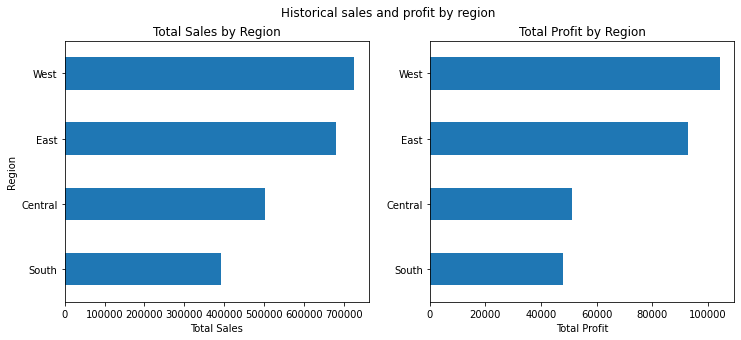

In [ ]:
total_profit_per_region = df_group_region['Profit'].sum().sort_values()
total_sales_per_region = df_group_region['Sales'].sum().sort_values()
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(4.8 * 2.5, 4.8))
fig.suptitle('Historical sales and profit by region')
total_sales_per_region.plot(kind='barh', ax=ax0)
_ = ax0.set_xlabel('Total Sales')
_ = ax0.set_title('Total Sales by Region')
total_profit_per_region.plot(kind='barh', ax=ax1)
_ = ax1.set_xlabel('Total Profit')
_ = ax1.set_ylabel('')
_ = ax1.set_title('Total Profit by Region')
display(total_sales_per_region.to_frame(), total_profit_per_region.to_frame())

### Which products / categories contribute more to sales?

In [ ]:
df.groupby('Region')['Sales'].nlargest(100).sum() / df.groupby('Region')['Sales'].sum()
df_sales = df.groupby('Region')[['Sales']].sum()
for region in df['Region'].unique():
    df_sales.loc[region, 'Top100'] = df[df['Region'] == region].nlargest(1000, 'Sales')['Sales'].sum()
# df.groupby('Region')['Sales'].rank('max')

top_q_2017 = get_quantile_by_year(0.75, 2017)
df_q75_sales_2017 = pd.concat([
    df[(df['Region'] == region) & (df['Sales'] >= q75_2017.loc[region, 'Sales'])]
    for region in df['Region'].unique()
])
for region in df['Region'].unique():
    df_sales.loc[region, 'Q75'] = df_q75_sales_2017[df_q75_sales_2017['Region'] == region]['Sales'].sum()
df_sales['Q75'] / df_sales['Sales']

KeyError: ignored

In [ ]:
top_q_2017 = get_quantile_by_year(0.75, 2017)
q75_2017 = top_q_2017.unstack().transpose()
df_q75_sales_2017 = pd.concat([
    df[(df['Region'] == region) & (df['Sales'] >= q75_2017.loc[region, 'Sales'])]
    for region in df['Region'].unique()
])
# df_q75_sales_2017 = df_q75_sales_2017.set_index(['Region', 'Category', 'Sub-Category'])
g = sns.catplot(kind='bar', 
                data=uncategorize(df_q75_sales_2017.reset_index(), 'Sub-Category').sort_values(by='Category'), 
                col='Region', col_wrap=2, ci=None,
                x='Sales', y='Sub-Category_raw', 
                hue='Category')
_ = g.figure.suptitle('Categories comprising the top quartile of sales overall', y=1.03)

In [ ]:
nlargest_sales = df.groupby('Region')['Sales'].nlargest(1000)
df_tmp = df.iloc[nlargest_sales.reset_index(0).index] \
    .groupby(['Region', 'Category', 'Sub-Category'])['Sales'].sum()
df_tmp = df_tmp.mask(df_tmp == 0, np.nan).dropna()

In [ ]:
def uncategorize(df, col):
    return df.assign(**{f"{col}_raw": df[col].astype(str)})

g = sns.catplot(kind='bar', data=uncategorize(df_tmp.reset_index(), 'Sub-Category'), 
                col='Region', col_wrap=2,
                x='Sales', y='Sub-Category_raw', hue='Category')
_ = g.figure.suptitle('Categories comprising the 95% of sales overall', y=1.03)

In [ ]:
nlargest_sales_2017 = df[df['Order Year'] == 2017].groupby('Region')['Sales'].nlargest(1000)
df_tmp = df.iloc[nlargest_sales_2017.reset_index(0).index] \
    .groupby(['Region', 'Category', 'Sub-Category'])['Sales'].sum()
df_tmp = df_tmp.mask(df_tmp == 0, np.nan).dropna()


In [ ]:
g = sns.catplot(kind='bar', data=df_tmp.reset_index(), col='Region', col_wrap=2,
                y='Sales', x='Category')
_ = g.figure.suptitle('Categories comprising the 95% of sales in 2017', y=1.03)

In [ ]:
g = sns.catplot(kind='bar', data=df_tmp.reset_index(), col='Region', col_wrap=2,
                y='Sales', x='Sub-Category', hue='Category')
_ = g.figure.suptitle('Sub-Categories comprising the 95% of sales in 2017', y=1.03)
for ax in g.axes.flatten():
    ax.tick_params(axis='x', labelrotation=90)

In [ ]:
for region in df_tmp.index.get_level_values(0).unique():
    s = df_tmp.loc[region].sort_values(ascending=False)
    s.name = region
    display(s.to_frame())

### What were the top 10 products by region in 2017 by sales?

In [ ]:
df_q = df.groupby(['Region', 'Order Year'])[['Sales']].quantile(q=[0.25, 0.5, 0.75])
q = df_q.loc[('Central', 2017, 0.25)].to_numpy()[0]
df[(df['Region'] == 'Central') & (df['Sales'] < q)]
qs = df_q.loc[('Central', 2017)]
q25 = qs.loc[0.25].Sales
q50 = qs.loc[0.5].Sales
q75 = qs.loc[0.75].Sales
max_sales = df.loc[df['Region'] == 'Central', 'Sales'].max()
pd.cut(df.loc[df['Region'] == 'Central', 'Sales'], bins=[0, q25, q50, q75, max_sales]).value_counts()

(181.954, 17499.95]    611
(0.0, 14.268]          572
(43.391, 181.954]      570
(14.268, 43.391]       569
Name: Sales, dtype: int64

In [ ]:
def get_quantile_by_year(q: Union[List[float], float], 
                         year: Union[List[int], int],
                         col: List[str]=['Sales']) -> pd.DataFrame:
    quantiles = [q] if not isinstance(q, list) else q
    years = [year] if not isinstance(year, list) else year
    return df.groupby(['Region', 'Order Year'])[col].quantile(q=quantiles) \
        .unstack(0).loc[[(y, q_) for y in years for q_ in quantiles]]
        # .unstack(0).loc[[(year, q)]]

def mk_mask(region: str, sales_threshold: float) -> pd.DataFrame:
    return ((df['Region'] == region) 
            & (df['Sales'] <= sales_threshold.loc['Sales', region]))

bottom_q_2017 = get_quantile_by_year(0.25, 2017)
top_q_2017 = get_quantile_by_year(0.75, 2017)


In [ ]:
from typing import Tuple

def summarise_products(df):
    df_tmp = df.groupby(['Region', 'Category', 'Sub-Category'])[['Order ID']].count()
    return df_tmp.mask(df_tmp == 0, np.nan).dropna() \
        .rename(columns={'Order ID': 'Product Count'}) \
        .sort_values(by=['Region', 'Product Count'], ascending=[True, False])

def find_products(n=10, year=2017, col='Sales', top=True) -> pd.DataFrame:
    ncol = df.groupby(['Region', 'Order Year'])[col].apply(
        lambda x: x.nlargest(n) if top else x.nsmallest(n)
    )
    col_year = ncol.unstack(1)[year].dropna().reset_index(1)
    return df[df.index.isin(col_year['level_1'])] \
        .sort_values(by=['Region', col], ascending=[False, not top])

def barplot_products_by_region(df, col) -> sns.FacetGrid:
    return sns.catplot(kind='bar', data=df, y='Product ID', x=col, 
                       col='Region', col_wrap=2, sharey=False, ci=None,
                       color='b', seed=9901)


In [ ]:
df_sales_top10_2017 = find_products(top=True, col='Sales')
g = barplot_products_by_region(df_sales_top10_2017, 'Sales')

In [ ]:
df_sales_top10_2017[['Region', 'Category', 'Sub-Category', 'Product Name', 
                     'Sales', 'Discount', 'Profit']]

In 82.5% of the top-10 products by sales the company made a profit.

In [ ]:
df_sales_top10_2017['Profit'].apply(lambda x: 0 if x < 0 else 1).value_counts(normalize=True)

In [ ]:
summarise_products(df_sales_top10_2017)

In [ ]:
df_sales_top10_2017_ = df_sales_top10_2017.assign(**{'Sub-Category_str': df['Sub-Category'].astype(str)})
g = sns.catplot(kind='count', data=df_sales_top10_2017_, y='Sub-Category_str', hue='Region')
_ = g.ax.set_xlabel('Products in the top 10')
_ = g.ax.set_ylabel('Sub-Category')
_ = g.ax.set_title('Sub-Categories of the top 10 products by sales in 2017')

### What are the bottom 10 products by region in 2017 by sales?

In [ ]:
df_sales_bottom10_2017 = find_products(top=False)
g = barplot_products_by_region(df_sales_bottom10_2017, col='Sales')

In [ ]:
df_sales_bottom10_2017[['Region', 'Category', 'Sub-Category', 'Product Name', 
                        'Sales', 'Price_Unit', 'Discount', 'Profit']] \
    .sort_values(by=['Region', 'Sales', 'Sub-Category']) \
    .set_index(['Region', 'Category', 'Sub-Category'])

In [ ]:
df_bottom10_2017_ = df_sales_bottom10_2017.assign(
    **{'Sub-Category_str': df['Sub-Category'].astype(str)}
)
g = sns.catplot(kind='count', data=df_bottom10_2017_, y='Sub-Category_str', 
                hue='Region')
# _ = g.ax.tick_params(axis='x', labelrotation=90)
_ = g.ax.set_xlabel('Number of products in the bottom 10')
_ = g.ax.set_ylabel('Sub-Category')
_ = g.ax.set_title('Sub-Categories of products in the bottom 10 in 2017 by region')

In [ ]:
x = df_sales_top10_2017.groupby(['Region', 'Ship Mode'])[['Order ID']].count()
y = df_sales_bottom10_2017.groupby(['Region', 'Ship Mode'])[['Order ID']].count()
y.mask(y == 0, np.nan).dropna()

x.join(y, rsuffix='_top10', lsuffix='_bottom10')

In [ ]:
summarise_products(df_sales_bottom10_2017)

### What are the products that sold less (bottom quantile) in 2017?

In [ ]:
q25_2017#.loc['West']
q25_2017
bottom_q_2017.loc[:, ('Sales', 'Central')]#.loc[2017, 0.25]#.unstack()#.transpose().reset_index(0).loc['West']
bottom_q_2017.reset_index().transpose().loc['Sales', 'Central'][0]

In [ ]:
q25_2017 = bottom_q_2017.reset_index().transpose()

df_q25_sales_2017 = pd.concat([
    df[
       (df['Region'] == region) \
        & (df['Sales'] <= q25_2017.loc[('Sales', region), 0])
    ]
                                #    q25_2017.loc[region, 'Sales'])]
    for region in df['Region'].unique()
])

def uncategorize(df, col):
    return df.assign(**{f"{col}_raw": df[col].astype(str)})

def countplot_by_region(df: pd.DataFrame, col='Sub-Category'):
    g = sns.catplot(
        kind='bar',
        data=uncategorize(df_q25_sales_2017, col).sort_values(by='Category'),
        x='Sales',
        y=f'{col}_raw',
        col='Region',
        col_wrap=2,
        hue='Category',
        ci=None,
    )
    for ax in g.axes.ravel():
        ax.set_ylabel(col)
    return g

g = countplot_by_region(df_q25_sales_2017)
# for ax in g.axes.ravel():
#     ax.set_xlabel('Product count in sub-category')
_ = g.figure.suptitle('Sub-categories of products in the bottom quantile in 2017 by region', y=1.03)

In [ ]:
df_q25_sales_2017.groupby(['Region', 'Category'])[['Sales', 'Profit']] \
    .agg(['sum', 'count'])

In [ ]:
# df[(df['Region'] == 'East') & (df['Sales'] <= bottom_q_2017.loc['Sales', 'East'])][['Category', 'Sub-Category']].value_counts(normalize=True)
# df[(df['Region'] == 'East') & (df['Sales'] <= bottom_q_2017.loc['Sales', 'East'])][['Category', 'Sub-Category']].value_counts(normalize=True)

### What are the trends by region and sub-category?

In [ ]:
df_sums_yr = df.groupby(['Region', 'Order Year', 'Sub-Category']) \
    [['Sales', 'Profit', 'Quantity']].agg('sum').reset_index()
df_sums_yr.sample(5) 

,Region,Order Year,Sub-Category,Sales,Profit,Quantity
10,Central,2014,Labels,1048.472,469.49774,57.0
260,West,2017,Chairs,25446.920,861.69540,206.0
246,West,2016,Fasteners,263.720,95.84075,67.0
157,South,2015,Bookcases,1238.596,102.70120,21.0
88,East,2015,Binders,14206.681,4824.05600,370.0


In [ ]:
df[df['Order Year'] == 2017].groupby(['Region', 'Sub-Category'])['Sales'].sum().loc['Central'].sort_values(ascending=False)

Sub-Category
Chairs         23218.4650
Phones         23211.1560
Binders        21105.3760
Storage        13693.7400
Accessories    10919.6640
Tables         10589.3070
Appliances      8933.3080
Paper           6235.2800
Machines        5994.5650
Bookcases       5640.4772
Furnishings     5074.0220
Supplies        4407.5600
Copiers         3679.9280
Art             2291.2760
Envelopes       1196.5320
Labels           587.2420
Fasteners        320.2300
Name: Sales, dtype: float64

In [ ]:
df_sums_yr.sort_values(by=['Region', 'Sales'], ascending=[True, False])


,Region,Order Year,Sub-Category,Sales,Profit,Quantity,Sales_log
39,Central,2016,Chairs,23349.624,1949.311200,166.0,10.058379
56,Central,2017,Chairs,23218.465,2841.989575,168.0,10.052746
64,Central,2017,Phones,23211.156,4257.273500,191.0,10.052431
54,Central,2017,Binders,21105.376,-2199.505400,577.0,9.957330
5,Central,2014,Chairs,20754.052,1185.714550,136.0,9.940545
...,...,...,...,...,...,...,...
236,West,2015,Supplies,309.394,55.793875,35.0,5.737842
212,West,2014,Fasteners,276.808,80.658325,68.0,5.626930
246,West,2016,Fasteners,263.720,95.840750,67.0,5.578673
263,West,2017,Fasteners,243.136,84.827450,85.0,5.497725


In [ ]:
df_top.sample()

,index,Region,Order Year,Sub-Category,Sales,Profit,Quantity
1,54,West,2017,Binders,26550.166,8585.4081,707.0


In [ ]:
df_bottom['Sub-Category'].unique()

array(['Fasteners', 'Envelopes', 'Labels'], dtype=object)

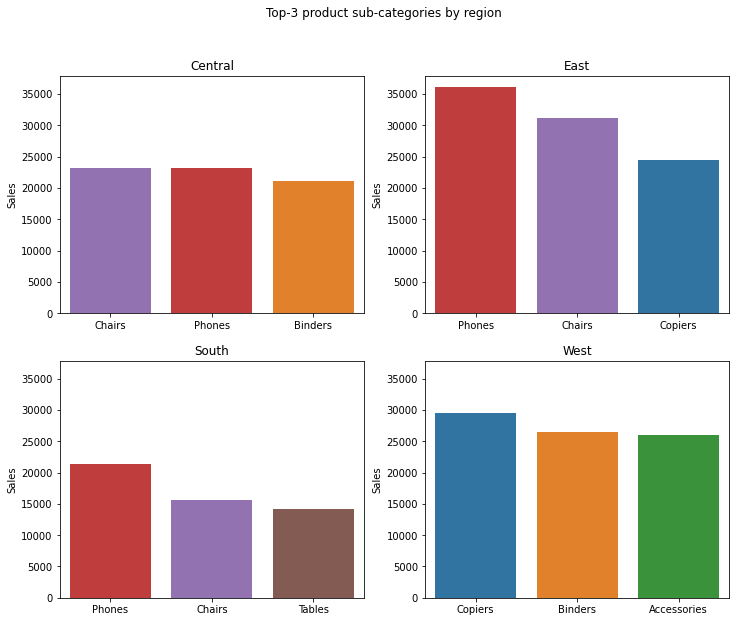

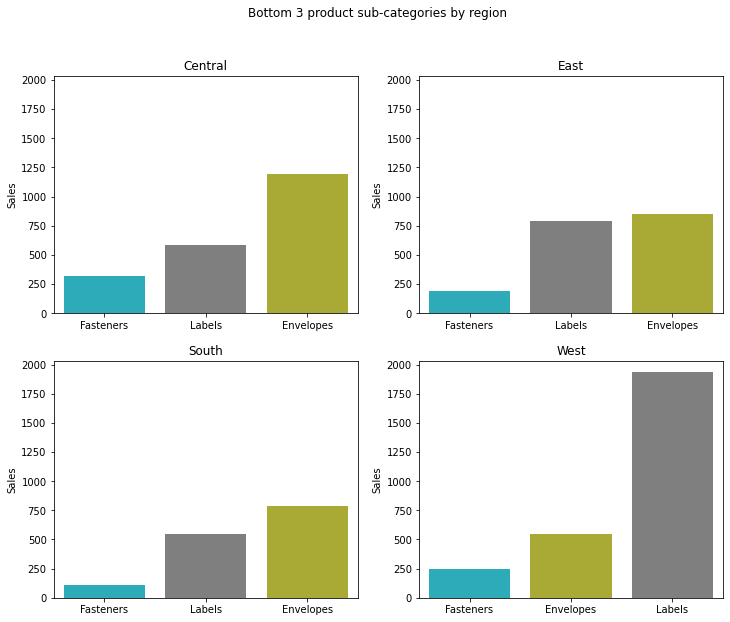

In [ ]:
x = df[df['Order Year'] == 2017].groupby(['Region', 'Order Year', 'Sub-Category'], as_index=False) \
    [['Sales', 'Profit', 'Quantity']].agg('sum')
dfs_top, dfs_bottom = [], []
for r in df['Region'].unique():
    dfs_top.append(x[x.Region == r].nlargest(3, 'Sales').reset_index())
    dfs_bottom.append(x[x.Region == r].nsmallest(3, 'Sales').reset_index())
#     display(r, x.loc[r].nlargest(5, 'Sales').reset_index(0, drop=True))
df_top = pd.concat(dfs_top)
df_bottom = pd.concat(dfs_bottom)
# df_top['Sub-Category'] = df_top['Sub-Category'].astype(object)
df_bottom['Sub-Category'] = df_bottom['Sub-Category'].astype(object)
df_melt = pd.melt(df_top.reset_index(),
                 id_vars=['Region', 'Sub-Category'],
                 value_vars=['Profit', 'Sales'])
palette = {
    'Copiers': sns.color_palette()[0],
    'Binders': sns.color_palette()[1],
    'Accessories': sns.color_palette()[2],
    'Phones': sns.color_palette()[3],
    'Chairs': sns.color_palette()[4],
    'Tables': sns.color_palette()[5],
}
# sns.catplot(kind='bar', data=df_melt, x='Sub-Category', y='value', col='Region',
#             ci=None, col_wrap=2, sharex=False, color=sns.color_palette()[0],
#             order=df_top['Sub-Category'].unique())

ax = None
fig = plt.figure(figsize=(4.8 * 2.5, 4.8 * 2))
fig.suptitle('Top-3 product sub-categories by region')
for i, r in enumerate(sorted(df['Region'].unique())):
    ax = plt.subplot(2, 2, i + 1, sharey=ax) # figsize=(4.8 * 3, 4.8))
    data = df_top[df_top['Region'] == r]
    sns.barplot(data=data, x='Sub-Category',  y='Sales', 
                ci=None, ax=ax, order=data['Sub-Category'].unique(),
                palette=palette)
    ax.set_title(r)
    ax.set_xlabel('')

ax = None
fig = plt.figure(figsize=(4.8 * 2.5, 4.8 * 2))
fig.suptitle('Bottom 3 product sub-categories by region')
palette = dict(zip(
    # ['Machines', 'Bookcases', 'Tables', 'Supplies', 'Fasteners', 'Binders', 'Furnishings'],
    ['Fasteners', 'Envelopes', 'Labels'],
    [c for c in sns.color_palette()][::-1],
))
for i, r in enumerate(sorted(df['Region'].unique())):
    ax = plt.subplot(2, 2, i + 1, sharey=ax) # figsize=(4.8 * 3, 4.8))
    data = df_bottom[df_bottom['Region'] == r]
    sns.barplot(data=data, x='Sub-Category',  y='Sales', 
                ci=None, ax=ax, order=data['Sub-Category'].unique(),
                palette=palette)
    ax.set_title(r)
    ax.set_xlabel('')
# df_melt = pd.melt(df_bottom.reset_index(),
#                  id_vars=['Region', 'Sub-Category'],
#                  value_vars=['Profit', 'Sales'])
# sns.barplot(data=df_melt, hue='Sub-Category', y='value', x='Region', ci=None, ax=ax1)
# df_melt.sample(3)

In [ ]:
list(zip(
    ['Machines', 'Bookcases', 'Tables', 'Supplies', 'Fasteners', 'Binders', 'Furnishings'],
    [c for c in sns.color_palette()],
))

[('Machines', (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)),
 ('Bookcases', (1.0, 0.4980392156862745, 0.054901960784313725)),
 ('Tables', (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)),
 ('Supplies', (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)),
 ('Fasteners', (0.5803921568627451, 0.403921568627451, 0.7411764705882353)),
 ('Binders', (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)),
 ('Furnishings', (0.8901960784313725, 0.4666666666666667, 0.7607843137254902))]

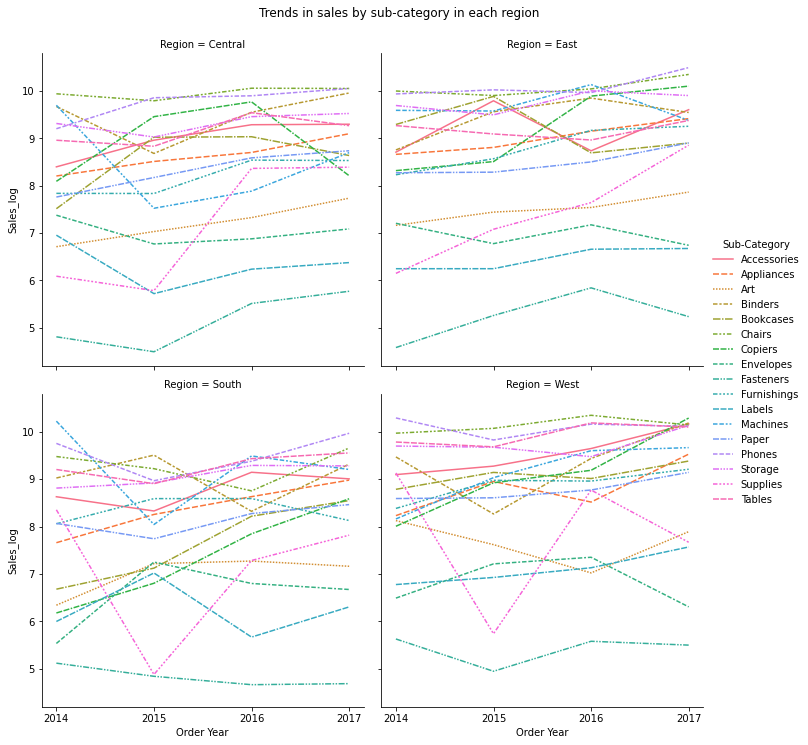

In [ ]:
df_sums_yr['Sales_log'] = np.log1p(df_sums_yr['Sales'])
g = sns.relplot(kind='line', data=df_sums_yr, 
                x='Order Year', y='Sales_log',
                style='Sub-Category',
                col='Region', col_wrap=2, hue='Sub-Category')
g.figure.suptitle('Trends in sales by sub-category in each region', y=1.03)
for ax in g.axes.ravel():
    ax.set_xticks([2014, 2015, 2016, 2017])

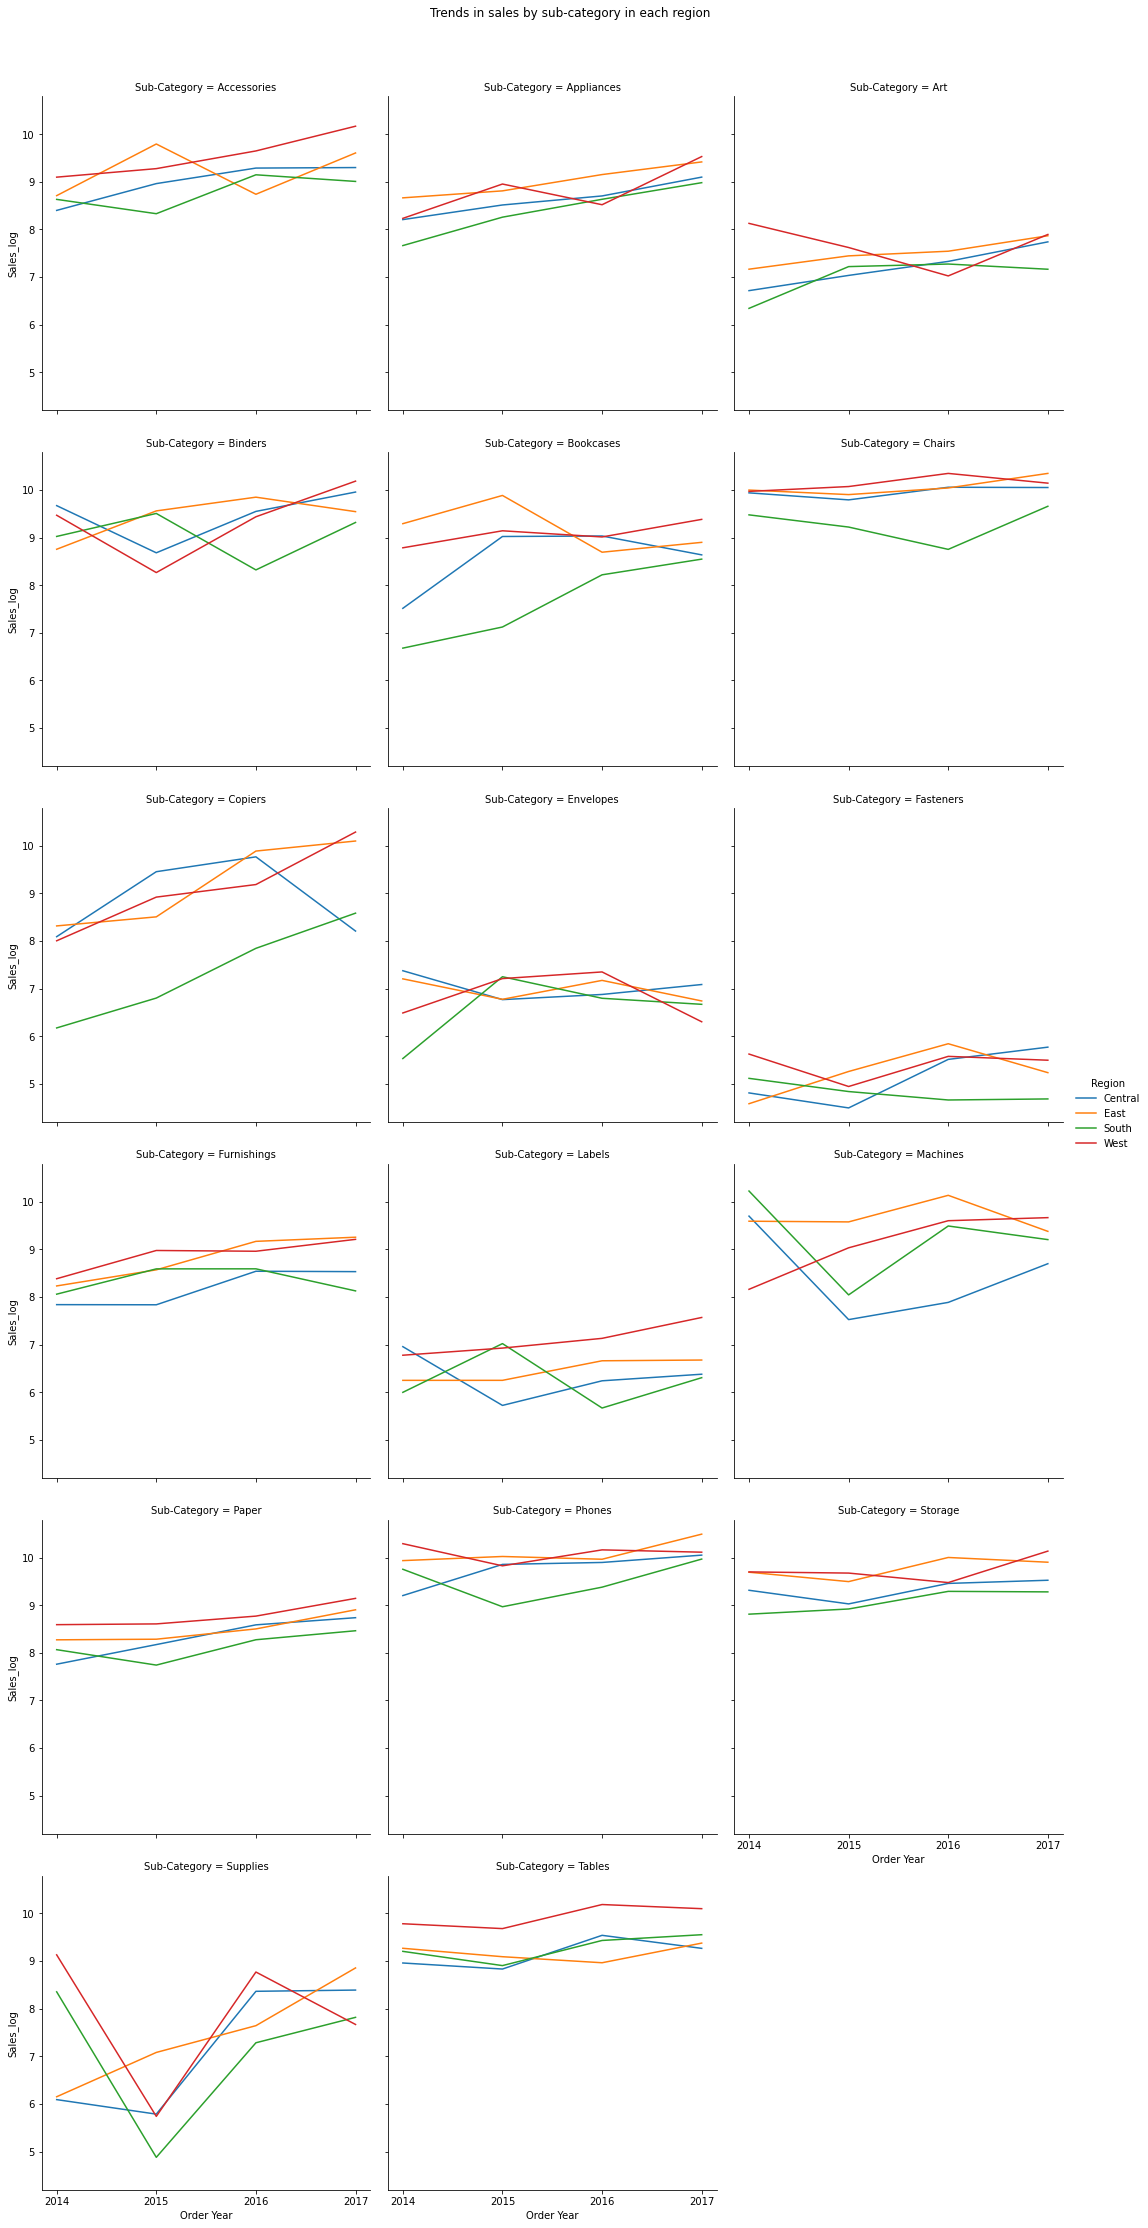

In [ ]:
df_sums_yr['Sales_log'] = np.log1p(df_sums_yr['Sales'])
g = sns.relplot(kind='line', data=df_sums_yr, 
                x='Order Year', y='Sales_log', 
                hue='Region', col_wrap=3, col='Sub-Category')
g.figure.suptitle('Trends in sales by sub-category in each region', y=1.03)
for ax in g.axes.ravel():
    ax.set_xticks([2014, 2015, 2016, 2017])

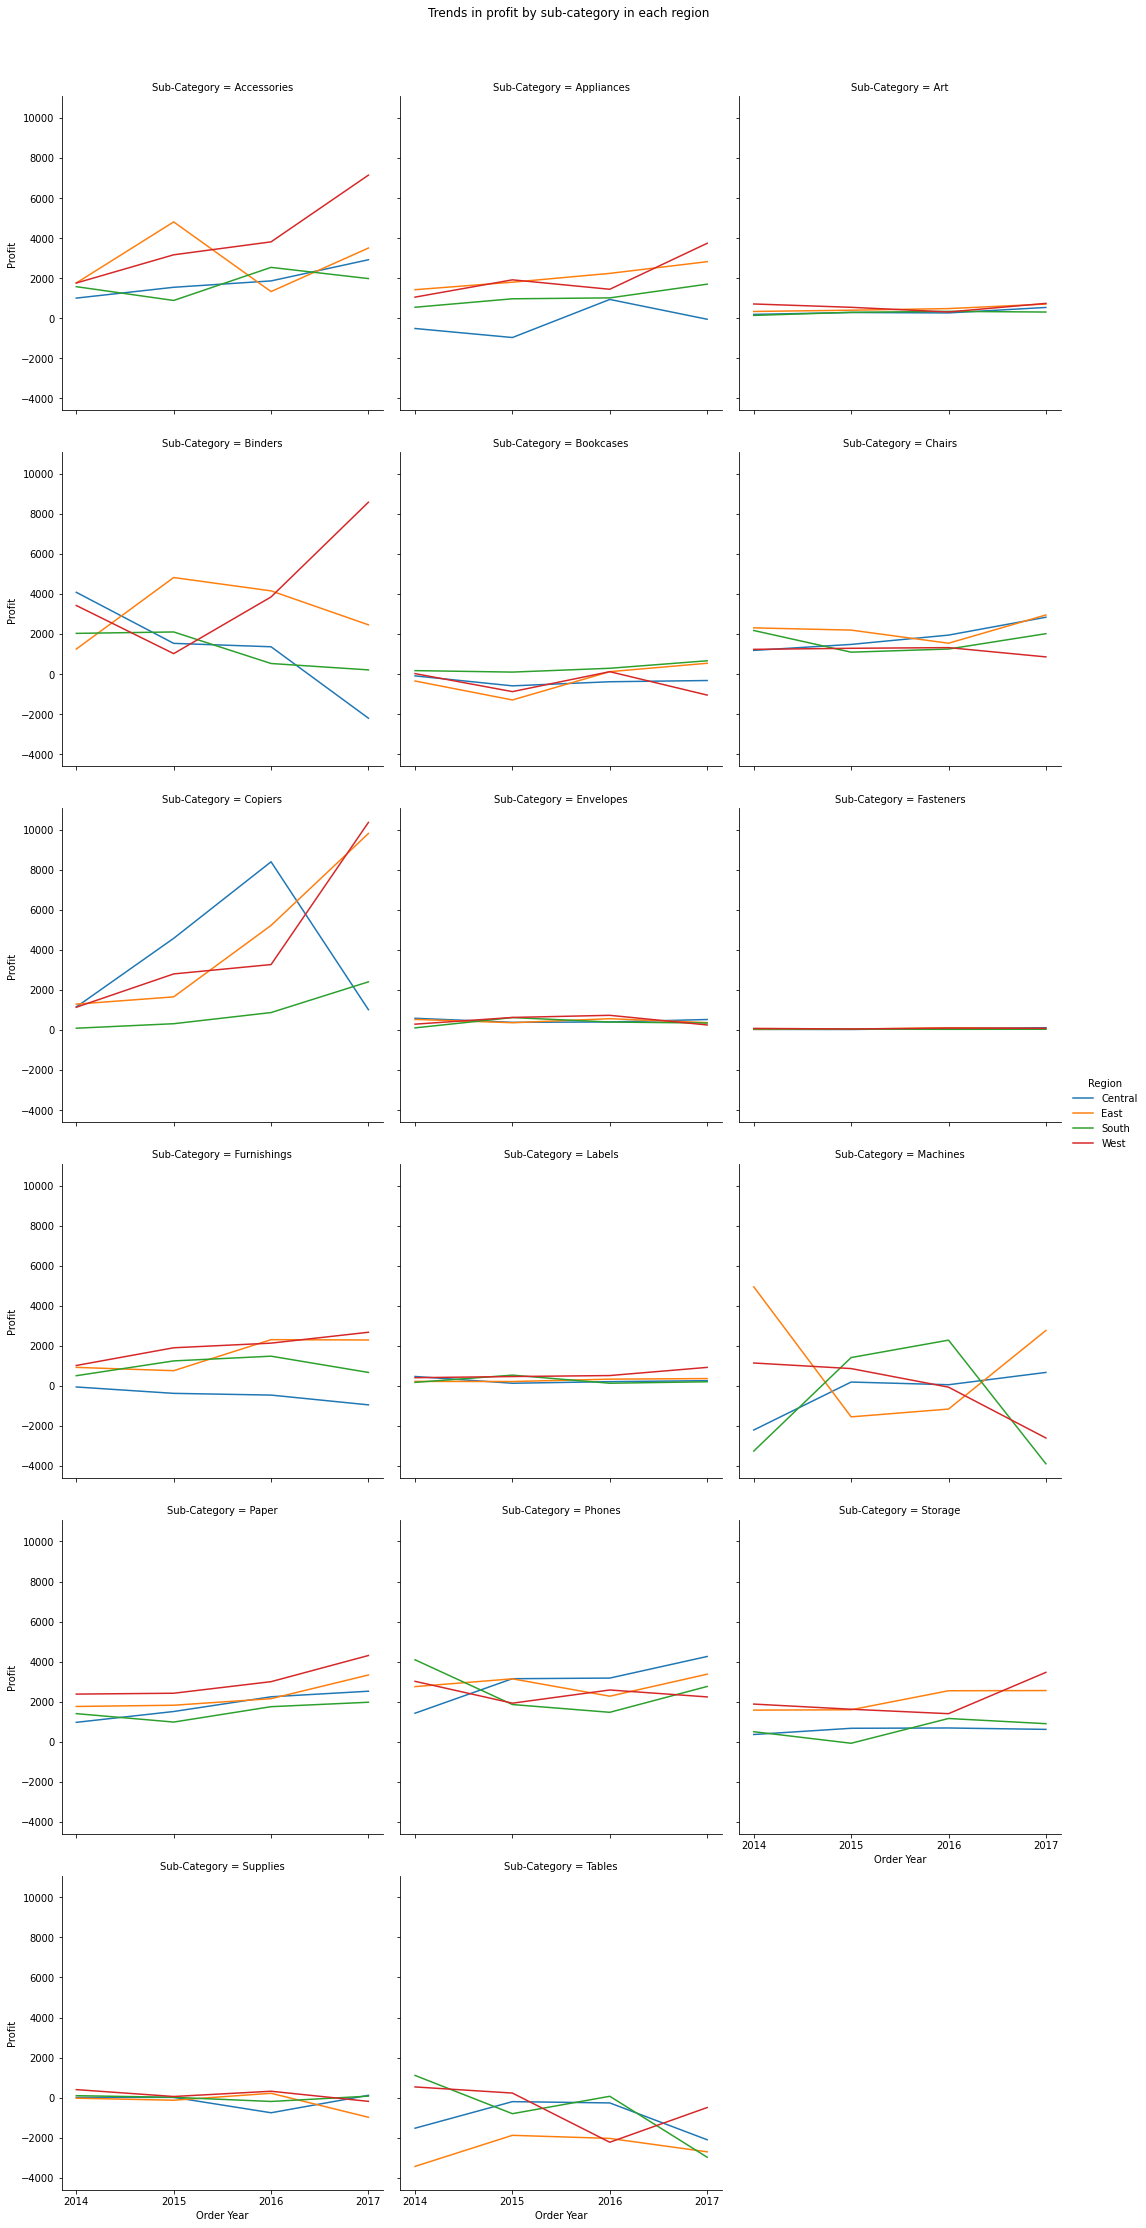

In [ ]:
g = sns.relplot(kind='line', data=df_sums_yr, 
                x='Order Year', y='Profit', 
                hue='Region', col_wrap=3, col='Sub-Category')
g.figure.suptitle('Trends in profit by sub-category in each region', y=1.03)
for ax in g.axes.ravel():
    ax.set_xticks([2014, 2015, 2016, 2017])

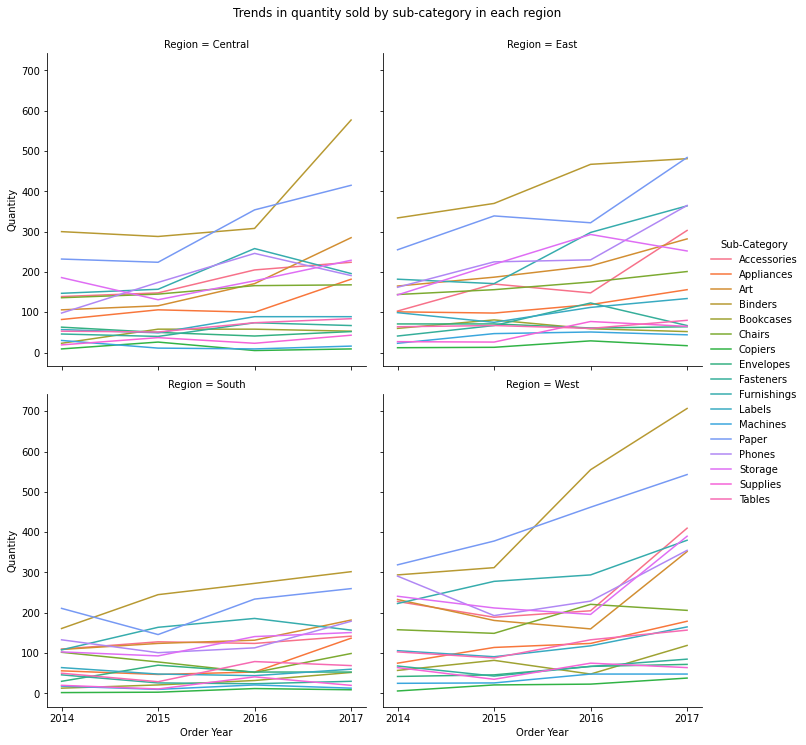

In [ ]:
g = sns.relplot(kind='line', data=df_sums_yr,#[df_sums_yr['Region'].isin(['Central', 'South'])],
                x='Order Year', y='Quantity', 
                col='Region', col_wrap=2, hue='Sub-Category')
g.figure.suptitle('Trends in quantity sold by sub-category in each region', y=1.03)
for ax in g.axes.ravel():
    ax.set_xticks([2014, 2015, 2016, 2017])

### Sales vs profits trends

Sales are increasing in all but the central region. Profits are dropping in the central and south regions and soaring in the eat and west regions. The trends in profits started in 2016.

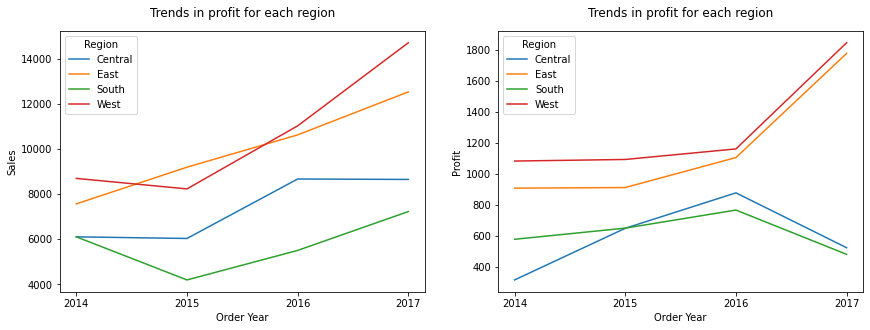

In [ ]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(4.8 * 3, 4.8), sharey=False)
sns.lineplot(data=df_sums_yr, x='Order Year', y='Sales', 
             hue='Region', ci=None, ax=ax0) #, col_wrap=3, col='Sub-Category')
sns.lineplot(data=df_sums_yr, x='Order Year', y='Profit', 
             hue='Region', ci=None, ax=ax1) #, col_wrap=3, col='Sub-Category')
_ = ax0.set_title('Trends in profit for each region', y=1.03)
_ = ax1.set_title('Trends in profit for each region', y=1.03)
_ = ax0.set_xticks([2014, 2015, 2016, 2017])
_ = ax1.set_xticks([2014, 2015, 2016, 2017])

### What are the products and categories with the higher loss in the south and central region?

In [ ]:
def find_products_loss(region, years: List[int]=[2017]) -> pd.DataFrame:
    total_prod_loss_profit = df[(df['Region'] == region) & (df['Order Year'].isin(years)) & (df['Profit'] <= 0)]
    # top10_prod_loss_profit = df[(df['Region'] == region) & (df['Order Year'].isin(years))].nsmallest(n, 'Profit')['Profit']
    return total_prod_loss_profit

s_central_profit_loss_2017 = find_products_loss('Central')
s_south_profit_loss_2017 = find_products_loss('South')


In [ ]:
s_central_profit_loss_2017.nsmallest(10, 'Profit')

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year
6984,US-2017-122714,2017-12-07,Standard Class,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845,2017
7303,CA-2017-131254,2017-11-19,First Class,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.7820,2017
4839,CA-2017-152093,2017-09-10,Standard Class,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,762.594,3,0.8,-1143.8910,2017
3988,US-2017-147221,2017-12-02,Second Class,Central,OFF-AP-10002534,Office Supplies,Appliances,3.6 Cubic Foot Counter Height Office Refrigerator,294.620,5,0.8,-766.0120,2017
3706,US-2017-124968,2017-09-08,Second Class,Central,FUR-TA-10004289,Furniture,Tables,BoxOffice By Design Rectangular and Half-Moon ...,765.625,7,0.5,-566.5625,2017
3387,US-2017-117247,2017-10-09,Standard Class,Central,FUR-TA-10002958,Furniture,Tables,"Bevis Oval Conference Table, Walnut",652.450,5,0.5,-430.6170,2017
5309,CA-2017-161739,2017-11-10,Second Class,Central,FUR-FU-10001468,Furniture,Furnishings,Tenex Antistatic Computer Chair Mats,341.960,5,0.6,-427.4500,2017
8559,CA-2017-131282,2017-02-05,Second Class,Central,OFF-BI-10004632,Office Supplies,Binders,Ibico Hi-Tech Manual Binding System,243.992,4,0.8,-426.9860,2017
5077,CA-2017-118773,2017-02-09,Standard Class,Central,OFF-BI-10004584,Office Supplies,Binders,GBC ProClick 150 Presentation Binding System,252.784,4,0.8,-417.0936,2017
6222,CA-2017-100223,2017-07-05,Standard Class,Central,FUR-FU-10003601,Furniture,Furnishings,"Deflect-o RollaMat Studded, Beveled Mat for Me...",332.028,9,0.6,-348.6294,2017


In [ ]:
s_south_profit_loss_2017.nsmallest(10, 'Profit')

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year
2676,US-2017-168116,2017-11-04,Same Day,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.9800,4,0.50,-3839.9904,2017
4921,US-2017-120390,2017-10-19,Standard Class,South,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1633.1880,4,0.70,-1306.5504,2017
9891,CA-2017-128363,2017-08-13,Standard Class,South,OFF-BI-10001359,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,1614.5820,6,0.70,-1237.8462,2017
7313,US-2017-162558,2017-10-02,First Class,South,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,2314.1160,7,0.40,-1002.7836,2017
7059,CA-2017-142090,2017-11-30,Standard Class,South,FUR-TA-10001889,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,1781.6820,7,0.40,-653.2834,2017
9337,CA-2017-168389,2017-12-11,Standard Class,South,FUR-TA-10004289,Furniture,Tables,BoxOffice By Design Rectangular and Half-Moon ...,721.8750,6,0.45,-420.0000,2017
9285,CA-2017-109183,2017-12-04,Standard Class,South,TEC-MA-10001856,Technology,Machines,Okidata C610n Printer,649.0000,2,0.50,-272.5800,2017
2225,US-2017-100930,2017-04-07,Standard Class,South,FUR-TA-10003473,Furniture,Tables,Bretford Rectangular Conference Table Tops,620.6145,3,0.45,-248.2458,2017
5791,CA-2017-147760,2017-11-04,First Class,South,FUR-TA-10004575,Furniture,Tables,Hon 5100 Series Wood Tables,523.7640,3,0.40,-192.0468,2017
2224,US-2017-100930,2017-04-07,Standard Class,South,FUR-TA-10001705,Furniture,Tables,Bush Advantage Collection Round Conference Table,233.8600,2,0.45,-102.0480,2017


100 products generate ~95% of losses in the central region

In [ ]:
s_central_profit_loss_2017.nsmallest(100, 'Profit')['Profit'].sum() / s_central_profit_loss_2017['Profit'].sum()

0.9576966720750976

50 products generated ~99% of losses in the south region in 2017.

In [ ]:
s_south_profit_loss_2017.nsmallest(50, 'Profit')['Profit'].sum() / s_south_profit_loss_2017['Profit'].sum()

0.988289358897893

Sub-categories that contributed more to loss in profits in the central region in 2017.

In [ ]:
s_central_profit_loss_2017['Sub-Category'].value_counts(normalize=True)

Binders        0.324742
Furnishings    0.159794
Tables         0.108247
Appliances     0.103093
Storage        0.087629
Chairs         0.087629
Accessories    0.051546
Bookcases      0.046392
Supplies       0.015464
Phones         0.010309
Machines       0.005155
Envelopes      0.000000
Copiers        0.000000
Labels         0.000000
Paper          0.000000
Art            0.000000
Fasteners      0.000000
Name: Sub-Category, dtype: float64

Sub-categories that contributed more to loss in profits in the south region in 2017.

In [ ]:
s_south_profit_loss_2017['Sub-Category'].value_counts(normalize=True)

NameError: ignored

Binders, Storage, Funrnishing, Tables and Chairs are common sub-categories in which the company made a loss. Binders being the bigger offender with ~1/3 of the losses.

### Trends for products underperforming in sales in 2017

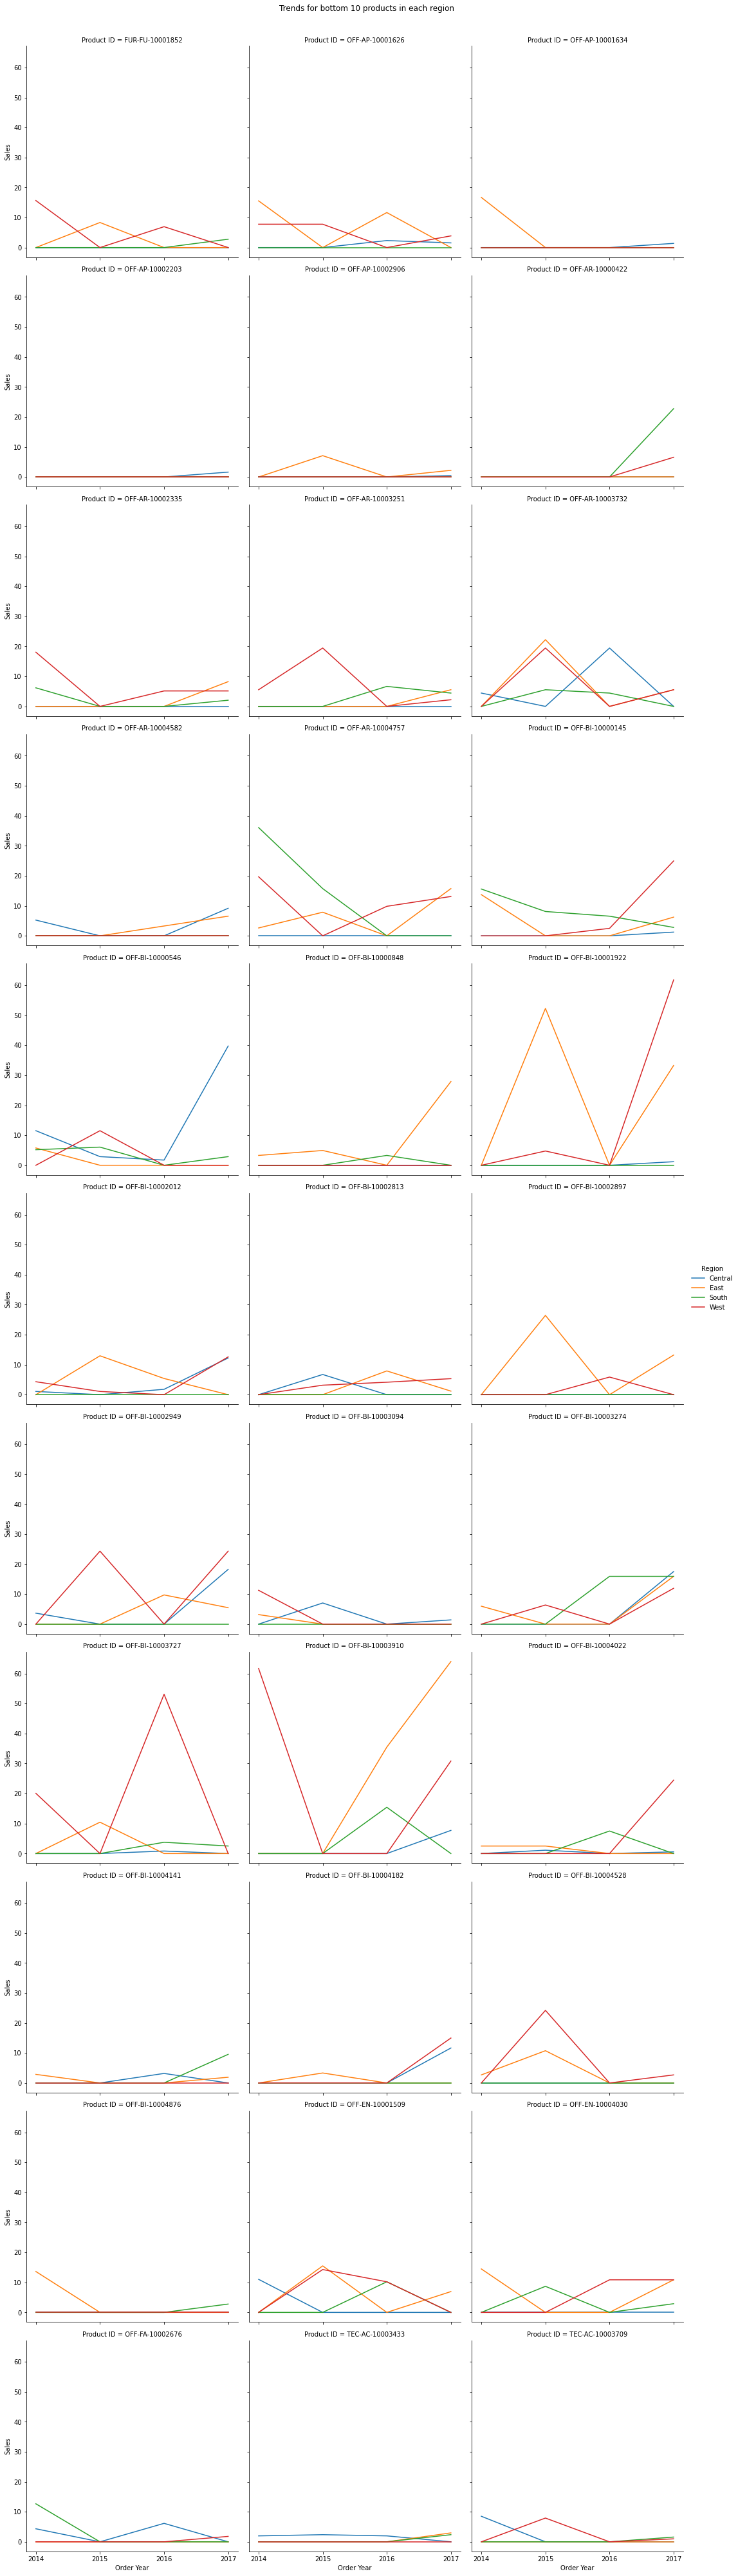

In [ ]:
bottom10_prod_ids = df_sales_bottom10_2017['Product ID'].unique()
g = sns.relplot(
    kind='line',
    data=df[df['Product ID'].isin(bottom10_prod_ids)] \
            .groupby(['Region', 'Order Year', 'Product ID'])[['Sales']] \
            .agg('sum').reset_index(),
    x='Order Year',
    y='Sales',
    col='Product ID',
    col_wrap=3,
    hue='Region',
)
g.figure.suptitle('Trends for bottom 10 products in each region', y=1.01)
for ax in g.axes.ravel():
    ax.set_xticks([2014, 2015, 2016, 2017])
plt.show()